# Definição do problema:

Otimizar decisões estratégicas e melhorar a eficiência operacional, com foco em maximizar o desempenho da empresa, pensando, principalmente, em solucionar as dores do cliente

# Importação dos dados:

In [886]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import math

In [887]:
import pandas as pd
df = pd.read_excel('Base_Kaiserhaus.xlsx')
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Tratamento de dados

In [888]:
df.isnull().sum()

macro_bairro                 0
nome_cliente                 0
bairro_destino               0
order_datetime               0
platform                     0
order_mode                   0
distance_km                323
tempo_preparo_minutos        0
status                       0
eta_minutes_quote            0
actual_delivery_minutes    200
total_brl                    0
classe_pedido                0
platform_commission_pct      0
num_itens                    0
satisfacao_nivel             0
dtype: int64

In [889]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()

macro_bairro               0
nome_cliente               0
bairro_destino             0
order_datetime             0
platform                   0
order_mode                 0
distance_km                0
tempo_preparo_minutos      0
status                     0
eta_minutes_quote          0
actual_delivery_minutes    0
total_brl                  0
classe_pedido              0
platform_commission_pct    0
num_itens                  0
satisfacao_nivel           0
dtype: int64

In [890]:
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Coleta e exploração dos dados

Análise básica

In [891]:
df['status'].value_counts()

status
delivered     4802
canceled       180
chargeback      18
Name: count, dtype: int64

<Axes: xlabel='status'>

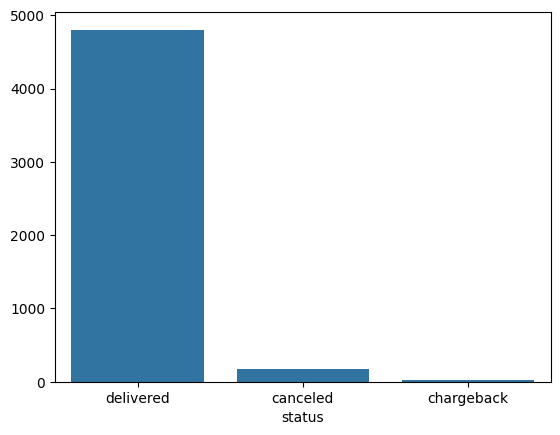

In [892]:
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values)

In [893]:
df['order_mode'].value_counts()

order_mode
delivery    4024
retirada     976
Name: count, dtype: int64

<Axes: xlabel='order_mode'>

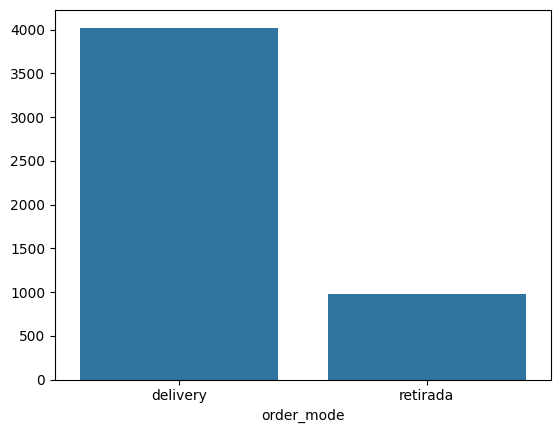

In [894]:
sns.barplot(x=df['order_mode'].value_counts().index, y=df['order_mode'].value_counts().values)

In [895]:
df['platform'].value_counts()

platform
ifood           2661
site_proprio    1052
rappi            747
whatsapp         540
Name: count, dtype: int64

<Axes: xlabel='platform'>

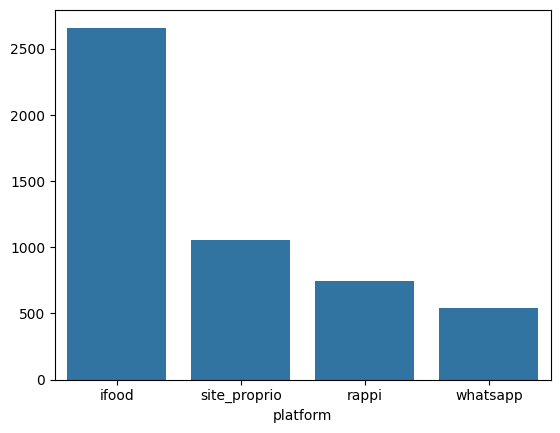

In [896]:
sns.barplot(x=df['platform'].value_counts().index, y=df['platform'].value_counts().values)

In [897]:
df['classe_pedido'].value_counts()

classe_pedido
prato_unico    2775
combo          1716
familia         509
Name: count, dtype: int64

<Axes: xlabel='classe_pedido'>

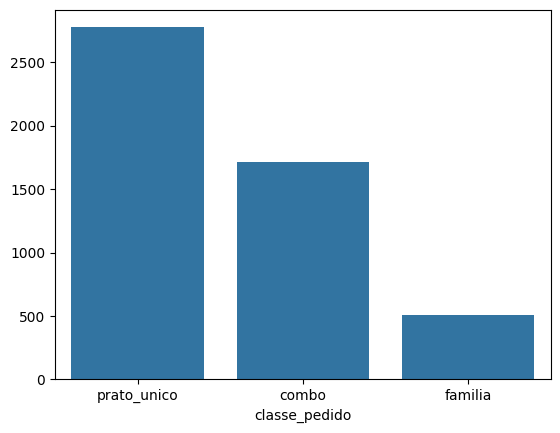

In [898]:
sns.barplot(x=df['classe_pedido'].value_counts().index, y=df['classe_pedido'].value_counts().values)

In [899]:
df['macro_bairro'].value_counts()

macro_bairro
Brooklin        881
Moema           679
Vila Mariana    530
Vila Olímpia    516
Itaim           497
Jardins         403
Pinheiros       393
Santo Amaro     387
Outros          364
Morumbi         350
Name: count, dtype: int64

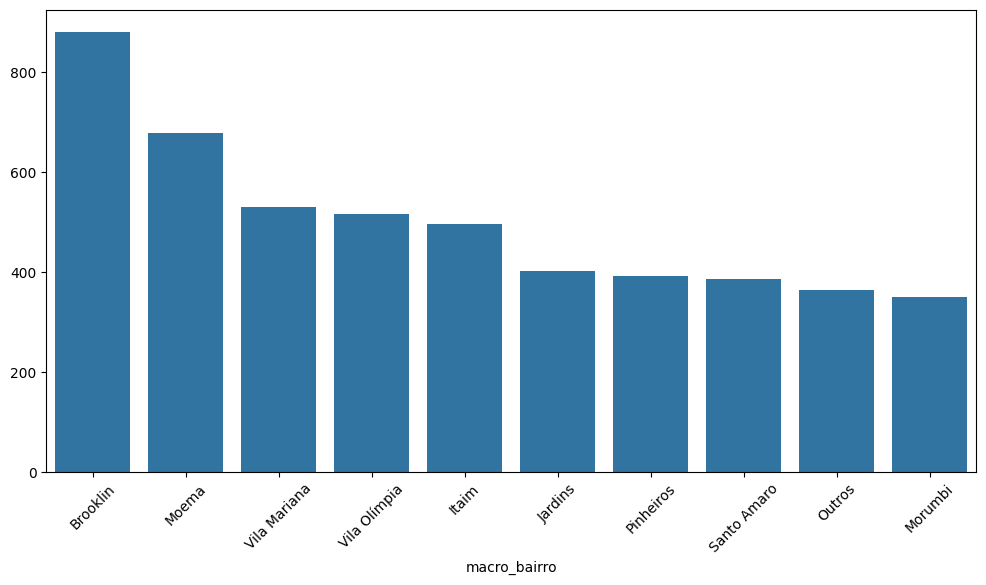

In [900]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['macro_bairro'].value_counts().index, y=df['macro_bairro'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

In [901]:
df.groupby('macro_bairro')['bairro_destino'].nunique()

macro_bairro
Brooklin        2
Itaim           1
Jardins         2
Moema           2
Morumbi         2
Outros          4
Pinheiros       1
Santo Amaro     2
Vila Mariana    3
Vila Olímpia    1
Name: bairro_destino, dtype: int64

In [902]:
df_brooklin = df.query('macro_bairro == "Brooklin"')
df_itaim = df.query('macro_bairro == "Itaim"')
df_jardins = df.query('macro_bairro == "Jardins"')
df_moema = df.query('macro_bairro == "Moema"')
df_morumbi = df.query('macro_bairro == "Morumbi"')
df_outros = df.query('macro_bairro == "Outros"')
df_pinheiros = df.query('macro_bairro == "Pinheiros"')
df_santo_amaro = df.query('macro_bairro == "Santo Amaro"')
df_vila_mariana = df.query('macro_bairro == "Vila Mariana"')
df_vila_olimpia = df.query('macro_bairro == "Vila Olímpia"')

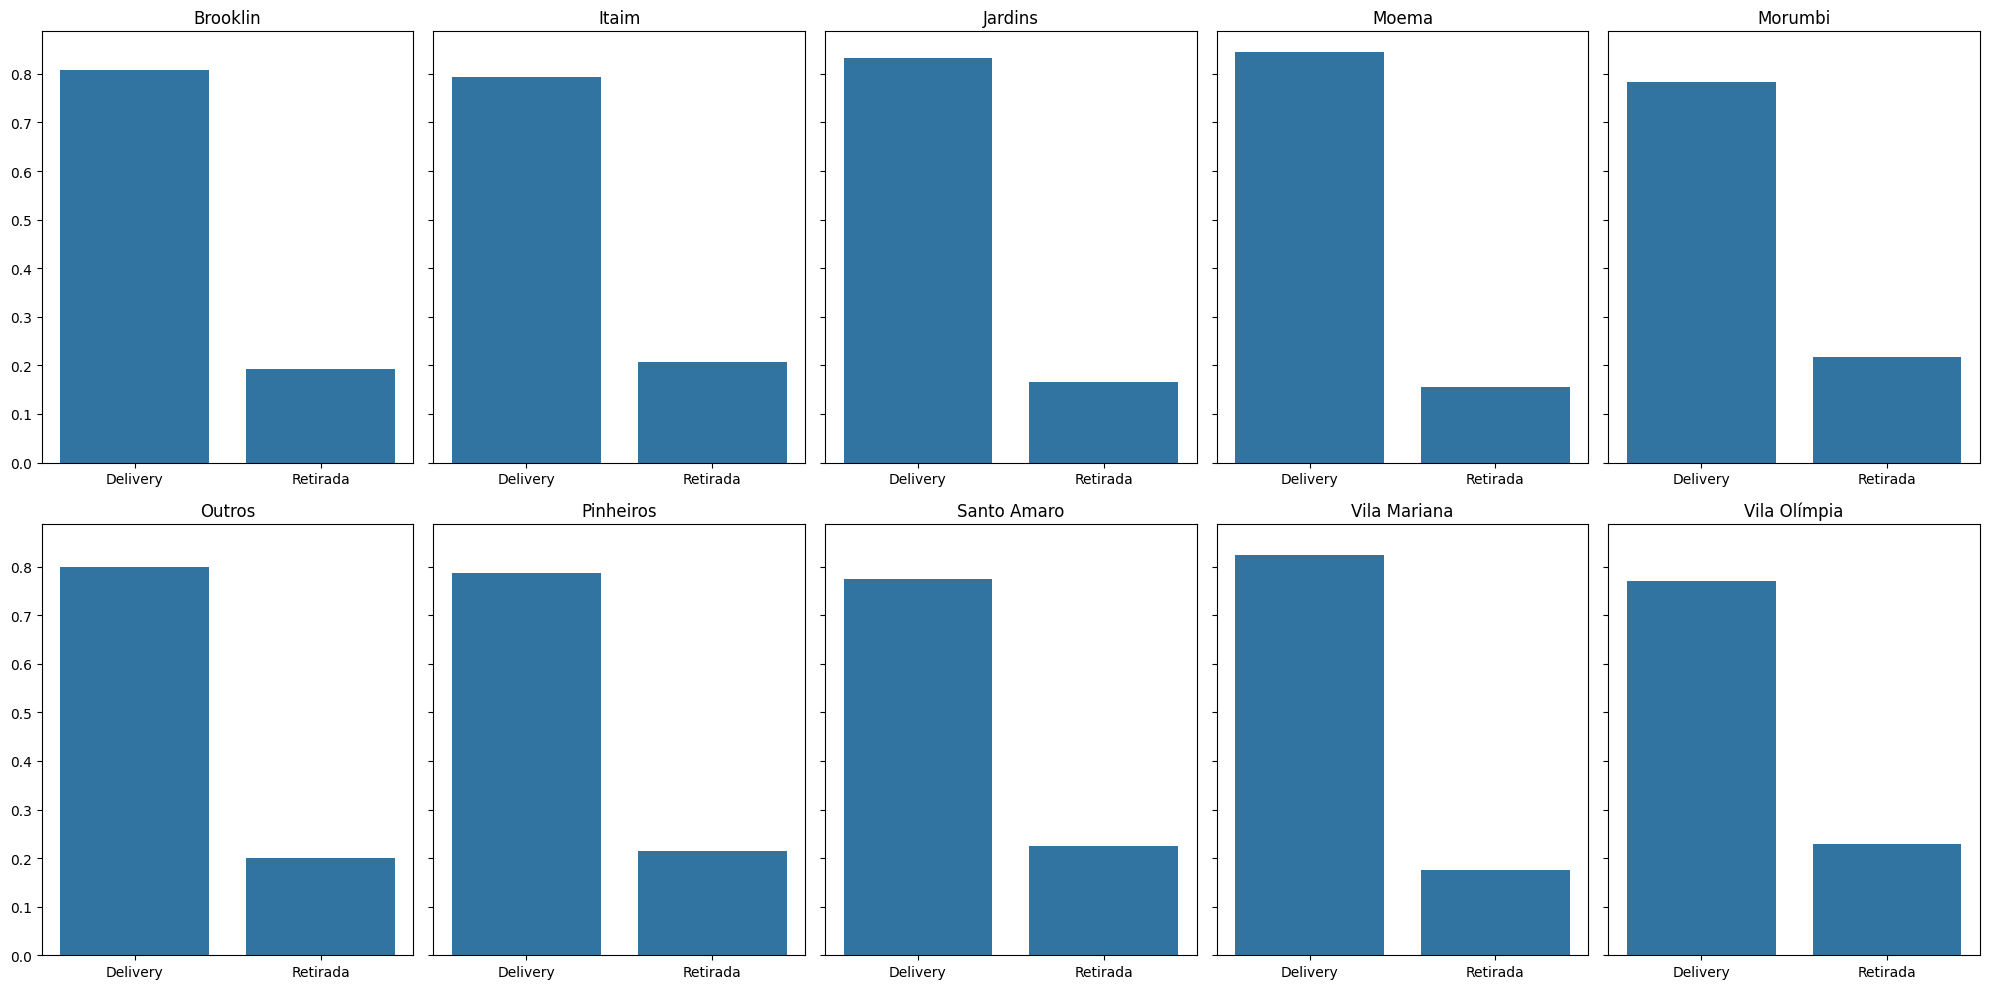

In [903]:
df_brooklin_tamanho = df_brooklin.count().unique()
df_delivery_brooklin = df_brooklin.query('order_mode == "delivery"').count().unique()
df_retirada_brooklin = df_brooklin.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_brooklin = (df_delivery_brooklin / df_brooklin_tamanho)
porcentagem_retirada_brooklin = (df_retirada_brooklin / df_brooklin_tamanho)




df_itaim_tamanho = df_itaim.count().unique()
df_delivery_itaim = df_itaim.query('order_mode == "delivery"').count().unique()
df_retirada_itaim = df_itaim.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_itaim = (df_delivery_itaim / df_itaim_tamanho)
porcentagem_retirada_itaim = (df_retirada_itaim / df_itaim_tamanho)




df_jardins_tamanho = df_jardins.count().unique()
df_delivery_jardins = df_jardins.query('order_mode == "delivery"').count().unique()
df_retirada_jardins = df_jardins.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_jardins = (df_delivery_jardins / df_jardins_tamanho)
porcentagem_retirada_jardins = (df_retirada_jardins / df_jardins_tamanho)




df_moema_tamanho = df_moema.count().unique()
df_delivery_moema = df_moema.query('order_mode == "delivery"').count().unique()
df_retirada_moema = df_moema.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_moema = (df_delivery_moema / df_moema_tamanho)
porcentagem_retirada_moema = (df_retirada_moema / df_moema_tamanho)




df_morumbi_tamanho = df_morumbi.count().unique()
df_delivery_morumbi = df_morumbi.query('order_mode == "delivery"').count().unique()
df_retirada_morumbi = df_morumbi.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_morumbi = (df_delivery_morumbi / df_morumbi_tamanho)
porcentagem_retirada_morumbi = (df_retirada_morumbi / df_morumbi_tamanho)



df_outros_tamanho = df_outros.count().unique()
df_delivery_outros = df_outros.query('order_mode == "delivery"').count().unique()
df_retirada_outros = df_outros.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_outros = (df_delivery_outros / df_outros_tamanho)
porcentagem_retirada_outros = (df_retirada_outros / df_outros_tamanho)




df_pinheiros_tamanho = df_pinheiros.count().unique()
df_delivery_pinheiros = df_pinheiros.query('order_mode == "delivery"').count().unique()
df_retirada_pinheiros = df_pinheiros.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_pinheiros = (df_delivery_pinheiros / df_pinheiros_tamanho)
porcentagem_retirada_pinheiros = (df_retirada_pinheiros / df_pinheiros_tamanho)




df_santo_amaro_tamanho = df_santo_amaro.count().unique()
df_delivery_santo_amaro = df_santo_amaro.query('order_mode == "delivery"').count().unique()
df_retirada_santo_amaro = df_santo_amaro.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_santo_amaro = (df_delivery_santo_amaro / df_santo_amaro_tamanho)
porcentagem_retirada_santo_amaro = (df_retirada_santo_amaro / df_santo_amaro_tamanho)




df_vila_mariana_tamanho = df_vila_mariana.count().unique()
df_delivery_vila_mariana = df_vila_mariana.query('order_mode == "delivery"').count().unique()
df_retirada_vila_mariana = df_vila_mariana.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_vila_mariana = (df_delivery_vila_mariana / df_vila_mariana_tamanho)
porcentagem_retirada_vila_mariana = (df_retirada_vila_mariana / df_vila_mariana_tamanho)




df_vila_olimpia_tamanho = df_vila_olimpia.count().unique()
df_delivery_vila_olimpia = df_vila_olimpia.query('order_mode == "delivery"').count().unique()
df_retirada_vila_olimpia = df_vila_olimpia.query('order_mode == "retirada"').count().unique()

porcentagem_delivery_vila_olimpia = (df_delivery_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_retirada_vila_olimpia = (df_retirada_vila_olimpia / df_vila_olimpia_tamanho)





fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)

sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_brooklin[0], porcentagem_retirada_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_itaim[0], porcentagem_retirada_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_jardins[0], porcentagem_retirada_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_moema[0], porcentagem_retirada_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_morumbi[0], porcentagem_retirada_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_outros[0], porcentagem_retirada_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_pinheiros[0], porcentagem_retirada_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_santo_amaro[0], porcentagem_retirada_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_vila_mariana[0], porcentagem_retirada_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Delivery', 'Retirada'], y=[porcentagem_delivery_vila_olimpia[0], porcentagem_retirada_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Olímpia')

plt.tight_layout()
plt.show()

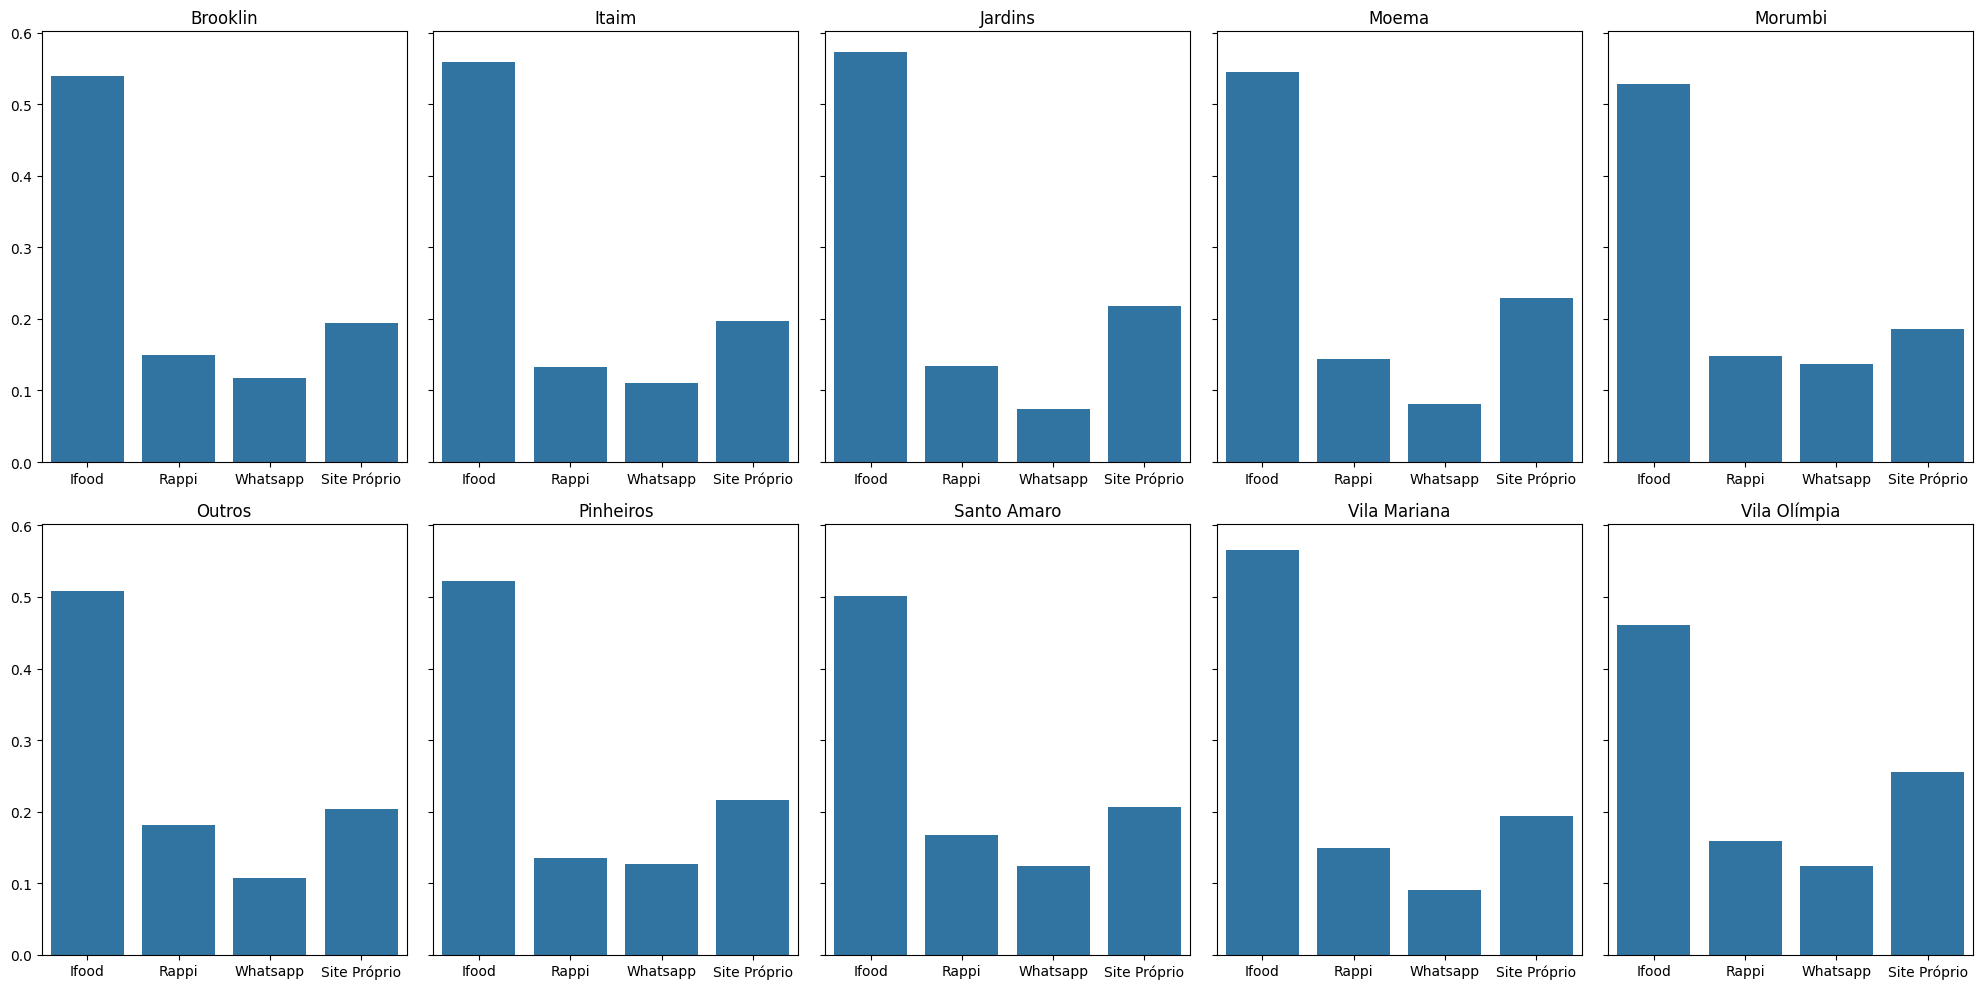

In [904]:
df_ifood_brooklin = df_brooklin.query('platform == "ifood"').count().unique()
df_rappi_brooklin = df_brooklin.query('platform == "rappi"').count().unique()
df_whatsapp_brooklin = df_brooklin.query('platform == "whatsapp"').count().unique()
df_site_proprio_brooklin = df_brooklin.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_brooklin = (df_ifood_brooklin / df_brooklin_tamanho)
porcentagem_rappi_brooklin = (df_rappi_brooklin / df_brooklin_tamanho)
porcentagem_whatsapp_brooklin = (df_whatsapp_brooklin / df_brooklin_tamanho)
porcentagem_site_proprio_brooklin = (df_site_proprio_brooklin / df_brooklin_tamanho)

df_ifood_itaim = df_itaim.query('platform == "ifood"').count().unique()
df_rappi_itaim = df_itaim.query('platform == "rappi"').count().unique()
df_whatsapp_itaim = df_itaim.query('platform == "whatsapp"').count().unique()
df_site_proprio_itaim = df_itaim.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_itaim = (df_ifood_itaim / df_itaim_tamanho)
porcentagem_rappi_itaim = (df_rappi_itaim / df_itaim_tamanho)
porcentagem_whatsapp_itaim = (df_whatsapp_itaim / df_itaim_tamanho)
porcentagem_site_proprio_itaim = (df_site_proprio_itaim / df_itaim_tamanho)

df_ifood_jardins = df_jardins.query('platform == "ifood"').count().unique()
df_rappi_jardins = df_jardins.query('platform == "rappi"').count().unique()
df_whatsapp_jardins = df_jardins.query('platform == "whatsapp"').count().unique()
df_site_proprio_jardins = df_jardins.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_jardins = (df_ifood_jardins / df_jardins_tamanho)
porcentagem_rappi_jardins = (df_rappi_jardins / df_jardins_tamanho)
porcentagem_whatsapp_jardins = (df_whatsapp_jardins / df_jardins_tamanho)
porcentagem_site_proprio_jardins = (df_site_proprio_jardins / df_jardins_tamanho)

df_ifood_moema = df_moema.query('platform == "ifood"').count().unique()
df_rappi_moema = df_moema.query('platform == "rappi"').count().unique()
df_whatsapp_moema = df_moema.query('platform == "whatsapp"').count().unique()
df_site_proprio_moema = df_moema.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_moema = (df_ifood_moema / df_moema_tamanho)
porcentagem_rappi_moema = (df_rappi_moema / df_moema_tamanho)
porcentagem_whatsapp_moema = (df_whatsapp_moema / df_moema_tamanho)
porcentagem_site_proprio_moema = (df_site_proprio_moema / df_moema_tamanho)

df_morumbi_tamanho = df_morumbi.count().unique()
df_ifood_morumbi = df_morumbi.query('platform == "ifood"').count().unique()
df_rappi_morumbi = df_morumbi.query('platform == "rappi"').count().unique()
df_whatsapp_morumbi = df_morumbi.query('platform == "whatsapp"').count().unique()
df_site_proprio_morumbi = df_morumbi.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_morumbi = (df_ifood_morumbi / df_morumbi_tamanho)
porcentagem_rappi_morumbi = (df_rappi_morumbi / df_morumbi_tamanho)
porcentagem_whatsapp_morumbi = (df_whatsapp_morumbi / df_morumbi_tamanho)
porcentagem_site_proprio_morumbi = (df_site_proprio_morumbi / df_morumbi_tamanho)

df_ifood_outros = df_outros.query('platform == "ifood"').count().unique()
df_rappi_outros = df_outros.query('platform == "rappi"').count().unique()
df_whatsapp_outros = df_outros.query('platform == "whatsapp"').count().unique()
df_site_proprio_outros = df_outros.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_outros = (df_ifood_outros / df_outros_tamanho)
porcentagem_rappi_outros = (df_rappi_outros / df_outros_tamanho)
porcentagem_whatsapp_outros = (df_whatsapp_outros / df_outros_tamanho)
porcentagem_site_proprio_outros = (df_site_proprio_outros / df_outros_tamanho)

df_ifood_pinheiros = df_pinheiros.query('platform == "ifood"').count().unique()
df_rappi_pinheiros = df_pinheiros.query('platform == "rappi"').count().unique()
df_whatsapp_pinheiros = df_pinheiros.query('platform == "whatsapp"').count().unique()
df_site_proprio_pinheiros = df_pinheiros.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_pinheiros = (df_ifood_pinheiros / df_pinheiros_tamanho)
porcentagem_rappi_pinheiros = (df_rappi_pinheiros / df_pinheiros_tamanho)
porcentagem_whatsapp_pinheiros = (df_whatsapp_pinheiros / df_pinheiros_tamanho)
porcentagem_site_proprio_pinheiros = (df_site_proprio_pinheiros / df_pinheiros_tamanho)

df_ifood_santo_amaro = df_santo_amaro.query('platform == "ifood"').count().unique()
df_rappi_santo_amaro = df_santo_amaro.query('platform == "rappi"').count().unique()
df_whatsapp_santo_amaro = df_santo_amaro.query('platform == "whatsapp"').count().unique()
df_site_proprio_santo_amaro = df_santo_amaro.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_santo_amaro = (df_ifood_santo_amaro / df_santo_amaro_tamanho)
porcentagem_rappi_santo_amaro = (df_rappi_santo_amaro / df_santo_amaro_tamanho)
porcentagem_whatsapp_santo_amaro = (df_whatsapp_santo_amaro / df_santo_amaro_tamanho)
porcentagem_site_proprio_santo_amaro = (df_site_proprio_santo_amaro / df_santo_amaro_tamanho)

df_ifood_vila_mariana = df_vila_mariana.query('platform == "ifood"').count().unique()
df_rappi_vila_mariana = df_vila_mariana.query('platform == "rappi"').count().unique()
df_whatsapp_vila_mariana = df_vila_mariana.query('platform == "whatsapp"').count().unique()
df_site_proprio_vila_mariana = df_vila_mariana.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_vila_mariana = (df_ifood_vila_mariana / df_vila_mariana_tamanho)
porcentagem_rappi_vila_mariana = (df_rappi_vila_mariana / df_vila_mariana_tamanho)
porcentagem_whatsapp_vila_mariana = (df_whatsapp_vila_mariana / df_vila_mariana_tamanho)
porcentagem_site_proprio_vila_mariana = (df_site_proprio_vila_mariana / df_vila_mariana_tamanho)

df_ifood_vila_olimpia = df_vila_olimpia.query('platform == "ifood"').count().unique()
df_rappi_vila_olimpia = df_vila_olimpia.query('platform == "rappi"').count().unique()
df_whatsapp_vila_olimpia = df_vila_olimpia.query('platform == "whatsapp"').count().unique()
df_site_proprio_vila_olimpia = df_vila_olimpia.query('platform == "site_proprio"').count().unique()
porcentagem_ifood_vila_olimpia = (df_ifood_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_rappi_vila_olimpia = (df_rappi_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_whatsapp_vila_olimpia = (df_whatsapp_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_site_proprio_vila_olimpia = (df_site_proprio_vila_olimpia / df_vila_olimpia_tamanho)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_brooklin[0], porcentagem_rappi_brooklin[0], porcentagem_whatsapp_brooklin[0], porcentagem_site_proprio_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_itaim[0], porcentagem_rappi_itaim[0], porcentagem_whatsapp_itaim[0], porcentagem_site_proprio_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_jardins[0], porcentagem_rappi_jardins[0], porcentagem_whatsapp_jardins[0], porcentagem_site_proprio_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_moema[0], porcentagem_rappi_moema[0], porcentagem_whatsapp_moema[0], porcentagem_site_proprio_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_morumbi[0], porcentagem_rappi_morumbi[0], porcentagem_whatsapp_morumbi[0], porcentagem_site_proprio_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_outros[0], porcentagem_rappi_outros[0], porcentagem_whatsapp_outros[0], porcentagem_site_proprio_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_pinheiros[0], porcentagem_rappi_pinheiros[0], porcentagem_whatsapp_pinheiros[0], porcentagem_site_proprio_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_santo_amaro[0], porcentagem_rappi_santo_amaro[0], porcentagem_whatsapp_santo_amaro[0], porcentagem_site_proprio_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_vila_mariana[0], porcentagem_rappi_vila_mariana[0], porcentagem_whatsapp_vila_mariana[0], porcentagem_site_proprio_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Ifood', 'Rappi', 'Whatsapp', 'Site Próprio'], y=[porcentagem_ifood_vila_olimpia[0], porcentagem_rappi_vila_olimpia[0], porcentagem_whatsapp_vila_olimpia[0], porcentagem_site_proprio_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Olímpia')
plt.tight_layout()
plt.show()

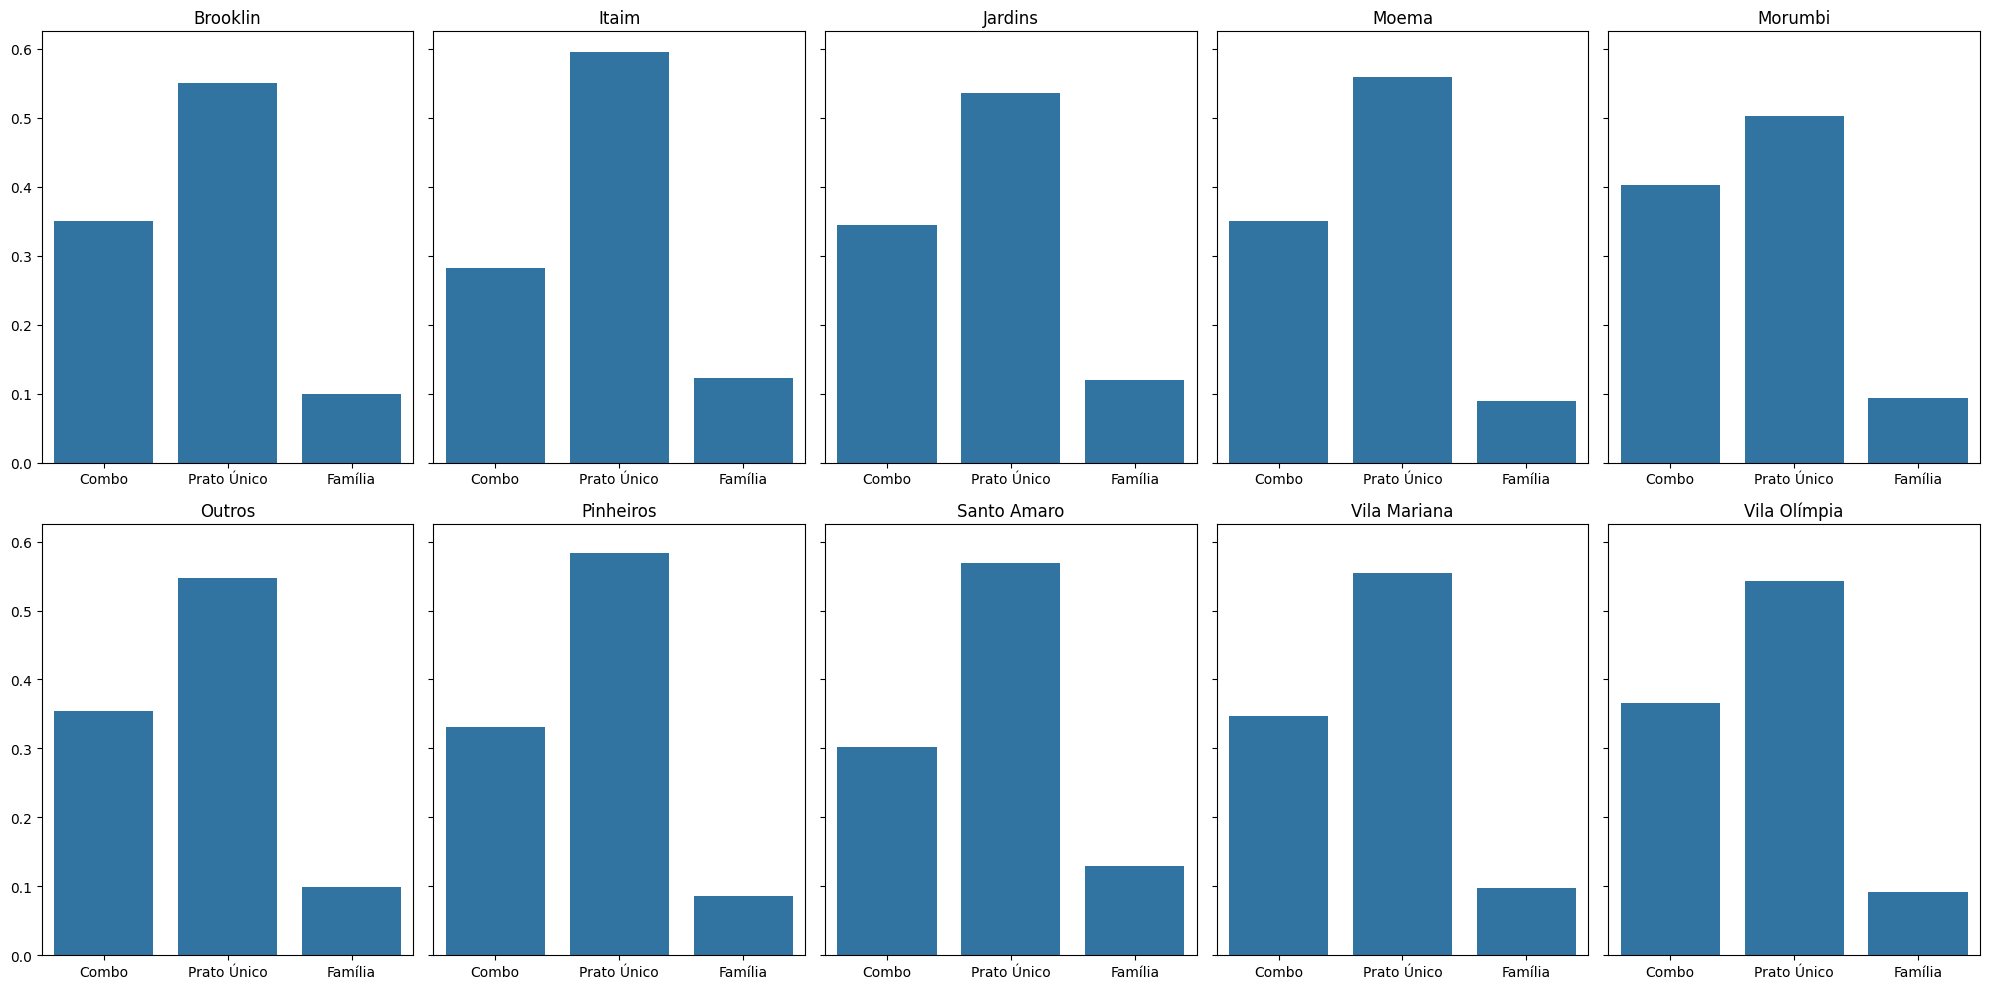

In [905]:
df_combo_brooklin = df_brooklin.query('classe_pedido == "combo"').count().unique()
df_prato_unico_brooklin = df_brooklin.query('classe_pedido == "prato_unico"').count().unique()
df_familia_brooklin = df_brooklin.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_brooklin = (df_combo_brooklin / df_brooklin_tamanho)
porcentagem_prato_unico_brooklin = (df_prato_unico_brooklin / df_brooklin_tamanho)
porcentagem_familia_brooklin = (df_familia_brooklin / df_brooklin_tamanho)

df_combo_itaim = df_itaim.query('classe_pedido == "combo"').count().unique()
df_prato_unico_itaim = df_itaim.query('classe_pedido == "prato_unico"').count().unique()
df_familia_itaim = df_itaim.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_itaim = (df_combo_itaim / df_itaim_tamanho)
porcentagem_prato_unico_itaim = (df_prato_unico_itaim / df_itaim_tamanho)
porcentagem_familia_itaim = (df_familia_itaim / df_itaim_tamanho)

df_combo_jardins = df_jardins.query('classe_pedido == "combo"').count().unique()
df_prato_unico_jardins = df_jardins.query('classe_pedido == "prato_unico"').count().unique()
df_familia_jardins = df_jardins.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_jardins = (df_combo_jardins / df_jardins_tamanho)
porcentagem_prato_unico_jardins = (df_prato_unico_jardins / df_jardins_tamanho)
porcentagem_familia_jardins = (df_familia_jardins / df_jardins_tamanho)

df_combo_moema = df_moema.query('classe_pedido == "combo"').count().unique()
df_prato_unico_moema = df_moema.query('classe_pedido == "prato_unico"').count().unique()
df_familia_moema = df_moema.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_moema = (df_combo_moema / df_moema_tamanho)
porcentagem_prato_unico_moema = (df_prato_unico_moema / df_moema_tamanho)
porcentagem_familia_moema = (df_familia_moema / df_moema_tamanho)

df_combo_morumbi = df_morumbi.query('classe_pedido == "combo"').count().unique()
df_prato_unico_morumbi = df_morumbi.query('classe_pedido == "prato_unico"').count().unique()
df_familia_morumbi = df_morumbi.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_morumbi = (df_combo_morumbi / df_morumbi_tamanho)
porcentagem_prato_unico_morumbi = (df_prato_unico_morumbi / df_morumbi_tamanho)
porcentagem_familia_morumbi = (df_familia_morumbi / df_morumbi_tamanho)

df_combo_outros = df_outros.query('classe_pedido == "combo"').count().unique()
df_prato_unico_outros = df_outros.query('classe_pedido == "prato_unico"').count().unique()
df_familia_outros = df_outros.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_outros = (df_combo_outros / df_outros_tamanho)
porcentagem_prato_unico_outros = (df_prato_unico_outros / df_outros_tamanho)
porcentagem_familia_outros = (df_familia_outros / df_outros_tamanho)

df_combo_pinheiros = df_pinheiros.query('classe_pedido == "combo"').count().unique()
df_prato_unico_pinheiros = df_pinheiros.query('classe_pedido == "prato_unico"').count().unique()
df_familia_pinheiros = df_pinheiros.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_pinheiros = (df_combo_pinheiros / df_pinheiros_tamanho)
porcentagem_prato_unico_pinheiros = (df_prato_unico_pinheiros / df_pinheiros_tamanho)
porcentagem_familia_pinheiros = (df_familia_pinheiros / df_pinheiros_tamanho)

df_combo_santo_amaro = df_santo_amaro.query('classe_pedido == "combo"').count().unique()
df_prato_unico_santo_amaro = df_santo_amaro.query('classe_pedido == "prato_unico"').count().unique()
df_familia_santo_amaro = df_santo_amaro.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_santo_amaro = (df_combo_santo_amaro / df_santo_amaro_tamanho)
porcentagem_prato_unico_santo_amaro = (df_prato_unico_santo_amaro / df_santo_amaro_tamanho)
porcentagem_familia_santo_amaro = (df_familia_santo_amaro / df_santo_amaro_tamanho)

df_combo_vila_mariana = df_vila_mariana.query('classe_pedido == "combo"').count().unique()
df_prato_unico_vila_mariana = df_vila_mariana.query('classe_pedido == "prato_unico"').count().unique()
df_familia_vila_mariana = df_vila_mariana.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_vila_mariana = (df_combo_vila_mariana / df_vila_mariana_tamanho)
porcentagem_prato_unico_vila_mariana = (df_prato_unico_vila_mariana / df_vila_mariana_tamanho)
porcentagem_familia_vila_mariana = (df_familia_vila_mariana / df_vila_mariana_tamanho)

df_combo_vila_olimpia = df_vila_olimpia.query('classe_pedido == "combo"').count().unique()
df_prato_unico_vila_olimpia = df_vila_olimpia.query('classe_pedido == "prato_unico"').count().unique()
df_familia_vila_olimpia = df_vila_olimpia.query('classe_pedido == "familia"').count().unique()
porcentagem_combo_vila_olimpia = (df_combo_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_prato_unico_vila_olimpia = (df_prato_unico_vila_olimpia / df_vila_olimpia_tamanho)
porcentagem_familia_vila_olimpia = (df_familia_vila_olimpia / df_vila_olimpia_tamanho)

fig, axes = plt.subplots(2, 5, figsize=(20,10), sharey=True)
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_brooklin[0], porcentagem_prato_unico_brooklin[0], porcentagem_familia_brooklin[0]], ax=axes[0,0]).set_title('Brooklin')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_itaim[0], porcentagem_prato_unico_itaim[0], porcentagem_familia_itaim[0]], ax=axes[0,1]).set_title('Itaim')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_jardins[0], porcentagem_prato_unico_jardins[0], porcentagem_familia_jardins[0]], ax=axes[0,2]).set_title('Jardins')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_moema[0], porcentagem_prato_unico_moema[0], porcentagem_familia_moema[0]], ax=axes[0,3]).set_title('Moema')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_morumbi[0], porcentagem_prato_unico_morumbi[0], porcentagem_familia_morumbi[0]], ax=axes[0,4]).set_title('Morumbi')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_outros[0], porcentagem_prato_unico_outros[0], porcentagem_familia_outros[0]], ax=axes[1,0]).set_title('Outros')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_pinheiros[0], porcentagem_prato_unico_pinheiros[0], porcentagem_familia_pinheiros[0]], ax=axes[1,1]).set_title('Pinheiros')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_santo_amaro[0], porcentagem_prato_unico_santo_amaro[0], porcentagem_familia_santo_amaro[0]], ax=axes[1,2]).set_title('Santo Amaro')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_vila_mariana[0], porcentagem_prato_unico_vila_mariana[0], porcentagem_familia_vila_mariana[0]], ax=axes[1,3]).set_title('Vila Mariana')
sns.barplot(x=['Combo', 'Prato Único', 'Família'], y=[porcentagem_combo_vila_olimpia[0], porcentagem_prato_unico_vila_olimpia[0], porcentagem_familia_vila_olimpia[0]], ax=axes[1,4]).set_title('Vila Olímpia')
plt.tight_layout()
plt.show()

In [906]:
df['distance_km'].describe()

count    5000.000000
mean        3.510049
std         2.501186
min         0.000002
25%         0.982585
50%         3.510049
75%         5.459546
max         9.949973
Name: distance_km, dtype: float64

<Axes: ylabel='distance_km'>

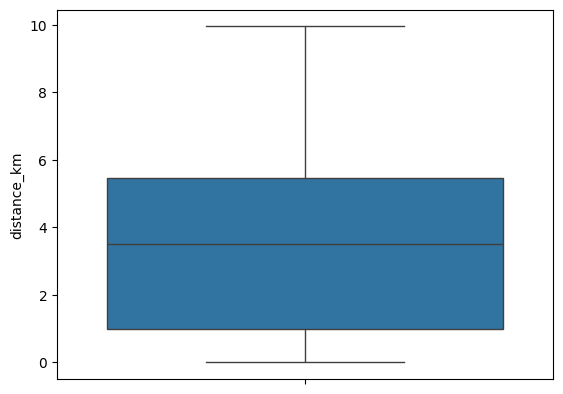

In [907]:
sns.boxplot(data=df, y=df['distance_km'])

<Axes: xlabel='distance_km', ylabel='Count'>

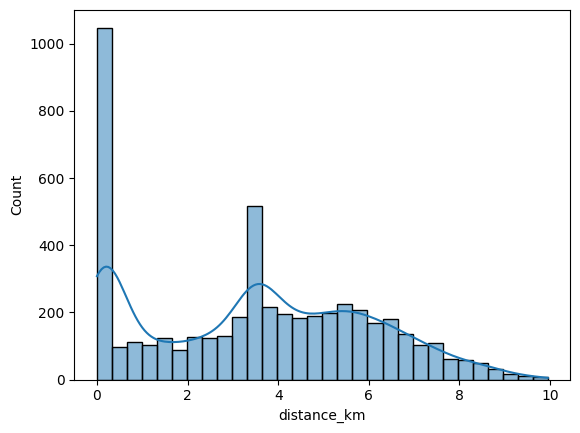

In [908]:
sns.histplot(df['distance_km'], bins=30, kde=True)

In [909]:
df['tempo_preparo_minutos'].describe()

count    5000.0000
mean       16.4228
std         7.9213
min         6.0000
25%        11.0000
50%        15.0000
75%        21.0000
max        57.0000
Name: tempo_preparo_minutos, dtype: float64

<Axes: ylabel='tempo_preparo_minutos'>

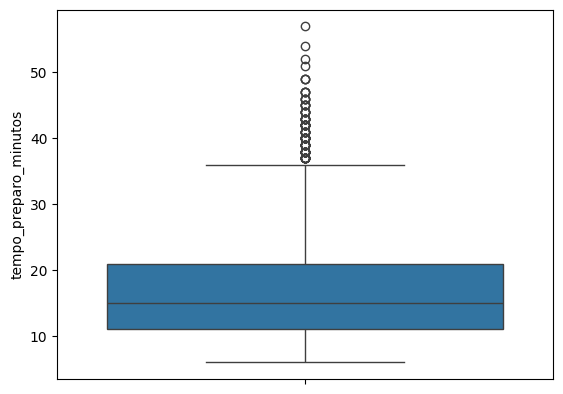

In [910]:
sns.boxplot(data=df, y=df['tempo_preparo_minutos'])

<Axes: xlabel='tempo_preparo_minutos', ylabel='Count'>

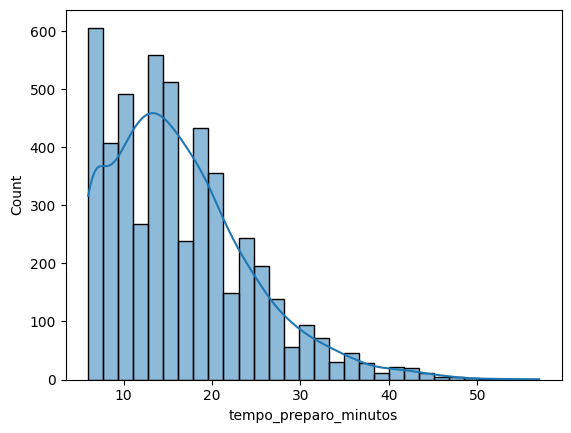

In [911]:
sns.histplot(df['tempo_preparo_minutos'], bins=30, kde=True)

In [912]:
df['eta_minutes_quote'].describe()

count    5000.00000
mean       37.47840
std         8.54654
min        12.00000
25%        32.00000
50%        39.00000
75%        44.00000
max        59.00000
Name: eta_minutes_quote, dtype: float64

<Axes: ylabel='eta_minutes_quote'>

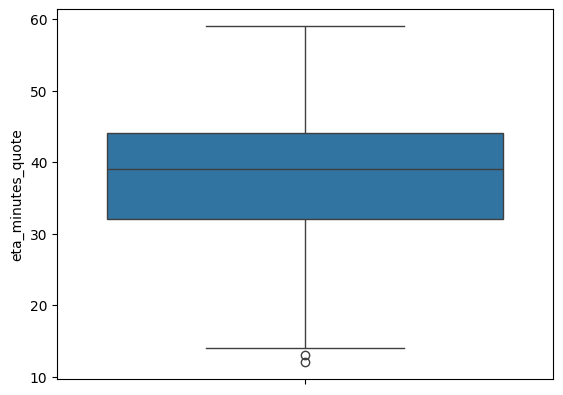

In [913]:
sns.boxplot(data=df, y=df['eta_minutes_quote'])

<Axes: xlabel='eta_minutes_quote', ylabel='Count'>

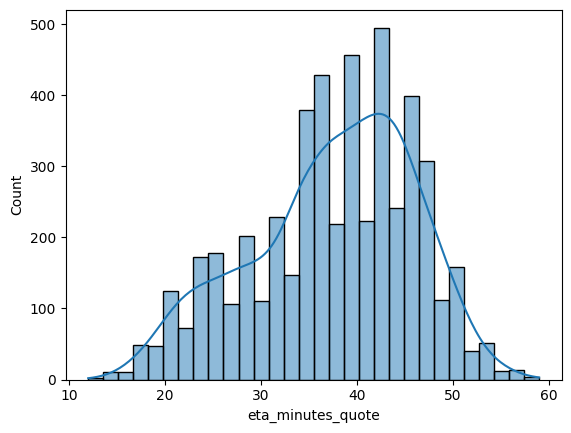

In [914]:
sns.histplot(df['eta_minutes_quote'], bins=30, kde=True)

In [915]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.524583
std        12.677838
min        -5.700000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

In [916]:
df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] = df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] * -1

In [917]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.531583
std        12.661520
min         0.000000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

<Axes: ylabel='actual_delivery_minutes'>

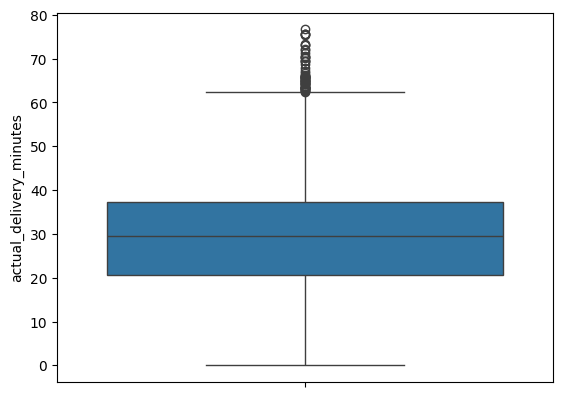

In [918]:
sns.boxplot(data=df, y=df['actual_delivery_minutes'])

<Axes: xlabel='actual_delivery_minutes', ylabel='Count'>

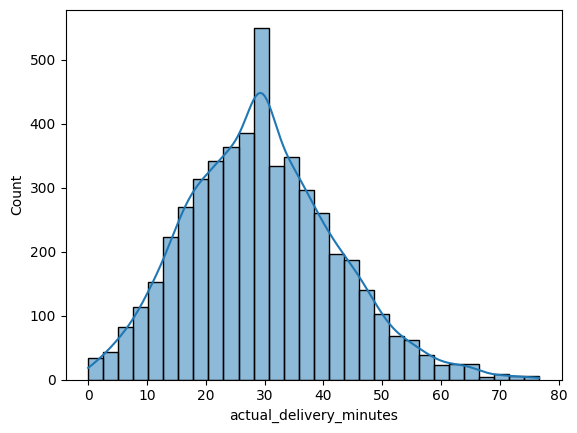

In [919]:
sns.histplot(df['actual_delivery_minutes'], bins=30, kde=True)

In [920]:
df['total_brl'].describe()

count    5000.000000
mean      110.609846
std        53.218753
min        17.380000
25%        72.220000
50%        98.470000
75%       133.915000
max       329.940000
Name: total_brl, dtype: float64

<Axes: ylabel='total_brl'>

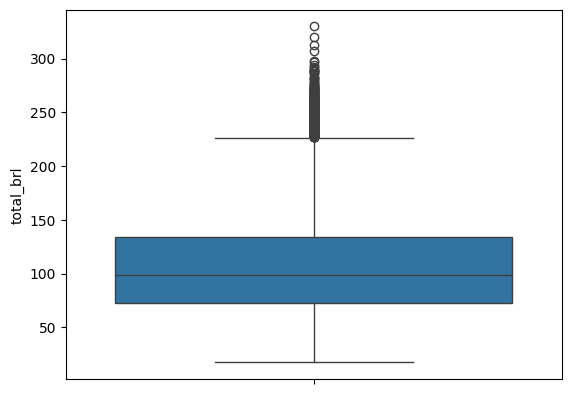

In [921]:
sns.boxplot(data=df, y=df['total_brl'])

<Axes: xlabel='total_brl', ylabel='Count'>

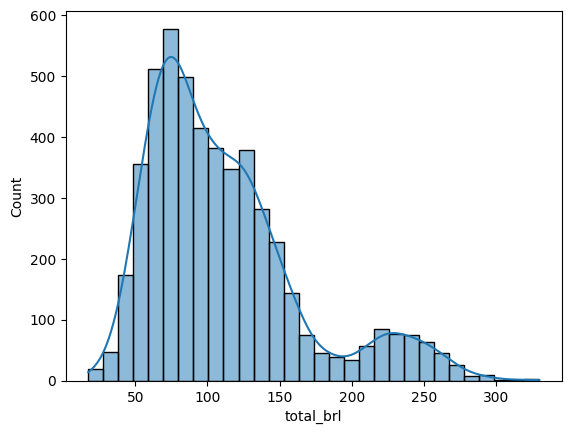

In [922]:
sns.histplot(df['total_brl'], bins=30, kde=True)

In [923]:
df['num_itens'].describe()

count    5000.000000
mean        3.255200
std         1.752452
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: num_itens, dtype: float64

<Axes: ylabel='num_itens'>

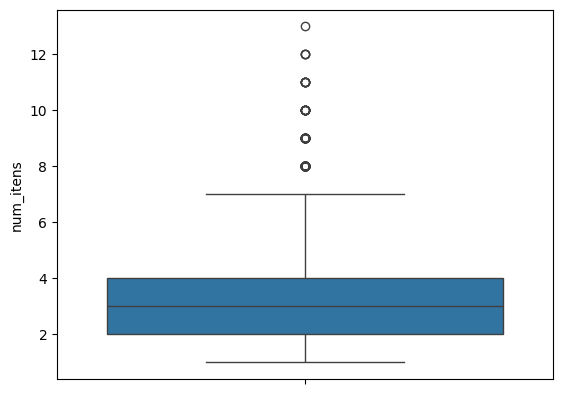

In [924]:
sns.boxplot(data=df, y=df['num_itens'])

<Axes: xlabel='num_itens', ylabel='Count'>

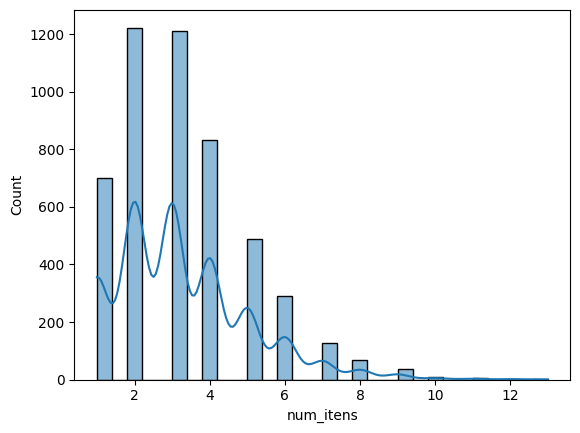

In [925]:
sns.histplot(df['num_itens'], bins=30, kde=True)

In [926]:
df['satisfacao_nivel'].describe()

count    5000.000000
mean        4.736400
std         0.550432
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: satisfacao_nivel, dtype: float64

<Axes: xlabel='satisfacao_nivel', ylabel='Count'>

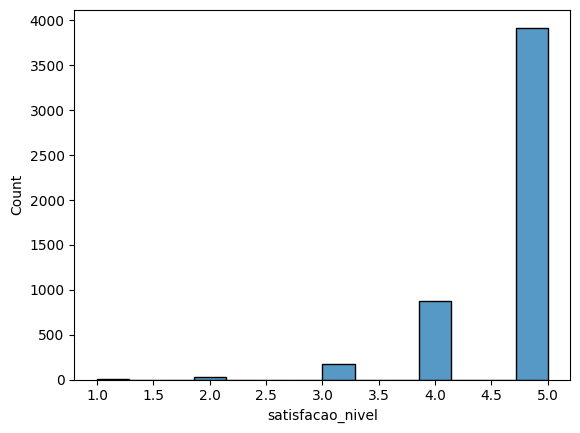

In [927]:
sns.histplot(df['satisfacao_nivel'])

Usando groupby

In [928]:
df.head(1)

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3


In [929]:
df.groupby(['platform', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
platform     satisfacao_nivel                                       
ifood        1                     243.51           NaN            1
             2                     235.87         35.55           26
             3                     200.97         59.25          123
             4                     135.57         55.17          582
             5                      96.46         40.15         1929
rappi        2                     207.39         59.27            4
             3                     211.87         51.83           35
             4                     128.90         54.67          169
             5                      94.52         40.92          539
site_proprio 2                     235.92           NaN            1
             3                     235.90         46.41            8
             4                     173.88         63.43           84
             5                     104.32         47.55          959
whatsapp     3                     247.36         46.63            7
             4                     168.41         74.18           40
             5                     102.97         44.99          493

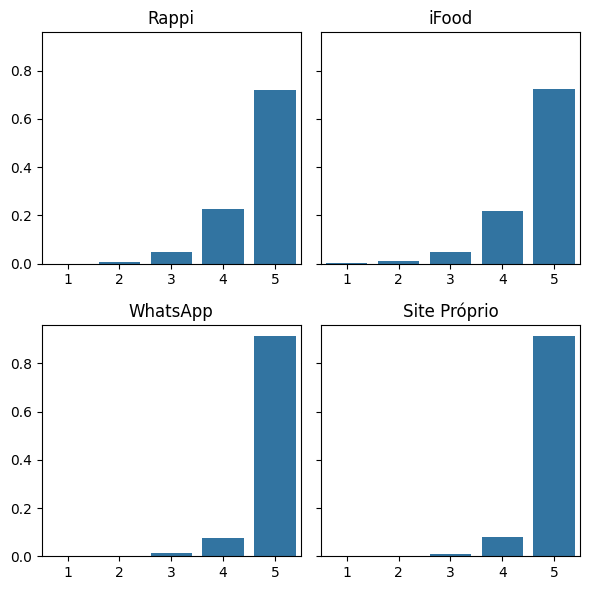

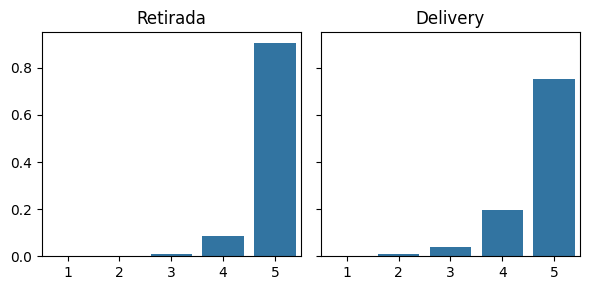

In [930]:
df_rappi_satisfacao_tamanho = df.query('platform == "rappi"').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_1 = df.query('platform == "rappi" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_2 = df.query('platform == "rappi" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_3 = df.query('platform == "rappi" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_4 = df.query('platform == "rappi" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_rappi_satisfacao_5 = df.query('platform == "rappi" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_rappi_satisfacao_1 = (df_rappi_satisfacao_1 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_2 = (df_rappi_satisfacao_2 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_3 = (df_rappi_satisfacao_3 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_4 = (df_rappi_satisfacao_4 / df_rappi_satisfacao_tamanho)
porcentagem_rappi_satisfacao_5 = (df_rappi_satisfacao_5 / df_rappi_satisfacao_tamanho)



df_ifood_satisfacao_tamanho = df.query('platform == "ifood"').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_1 = df.query('platform == "ifood" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_2 = df.query('platform == "ifood" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_3 = df.query('platform == "ifood" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_4 = df.query('platform == "ifood" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_ifood_satisfacao_5 = df.query('platform == "ifood" and   satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_ifood_satisfacao_1 = (df_ifood_satisfacao_1 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_2 = (df_ifood_satisfacao_2 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_3 = (df_ifood_satisfacao_3 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_4 = (df_ifood_satisfacao_4 / df_ifood_satisfacao_tamanho)
porcentagem_ifood_satisfacao_5 = (df_ifood_satisfacao_5 / df_ifood_satisfacao_tamanho)



df_whatsapp_satisfacao_tamanho = df.query('platform == "whatsapp"').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_1 = df.query('platform == "whatsapp" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_2 = df.query('platform == "whatsapp" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_3 = df.query('platform == "whatsapp" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_4 = df.query('platform == "whatsapp" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_whatsapp_satisfacao_5 = df.query('platform == "whatsapp" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_whatsapp_satisfacao_1 = (df_whatsapp_satisfacao_1 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_2 = (df_whatsapp_satisfacao_2 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_3 = (df_whatsapp_satisfacao_3 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_4 = (df_whatsapp_satisfacao_4 / df_whatsapp_satisfacao_tamanho)
porcentagem_whatsapp_satisfacao_5 = (df_whatsapp_satisfacao_5 / df_whatsapp_satisfacao_tamanho)



df_site_proprio_satisfacao_tamanho = df.query('platform == "site_proprio"').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_1 = df.query('platform == "site_proprio" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_2 = df.query('platform == "site_proprio" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_3 = df.query('platform == "site_proprio" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_4 = df.query('platform == "site_proprio" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_site_proprio_satisfacao_5 = df.query('platform == "site_proprio" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_site_proprio_satisfacao_1 = (df_site_proprio_satisfacao_1 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_2 = (df_site_proprio_satisfacao_2 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_3 = (df_site_proprio_satisfacao_3 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_4 = (df_site_proprio_satisfacao_4 / df_site_proprio_satisfacao_tamanho)
porcentagem_site_proprio_satisfacao_5 = (df_site_proprio_satisfacao_5 / df_site_proprio_satisfacao_tamanho)



df_retirada_satisacao_tamanho = df.query('order_mode == "retirada"').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_1 = df.query('order_mode == "retirada" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique() 
df_retirada_satisacao_2 = df.query('order_mode == "retirada" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_3 = df.query('order_mode == "retirada" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_4 = df.query('order_mode == "retirada" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_retirada_satisacao_5 = df.query('order_mode == "retirada" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_retirada_satisacao_1 = (df_retirada_satisacao_1 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_2 = (df_retirada_satisacao_2 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_3 = (df_retirada_satisacao_3 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_4 = (df_retirada_satisacao_4 / df_retirada_satisacao_tamanho)
porcentagem_retirada_satisacao_5 = (df_retirada_satisacao_5 / df_retirada_satisacao_tamanho)



df_delivery_satisacao_tamanho = df.query('order_mode == "delivery"').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_1 = df.query('order_mode == "delivery" and satisfacao_nivel == 1').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_2 = df.query('order_mode == "delivery" and satisfacao_nivel == 2').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_3 = df.query('order_mode == "delivery" and satisfacao_nivel == 3').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_4 = df.query('order_mode == "delivery" and satisfacao_nivel == 4').groupby('satisfacao_nivel').count().sum().unique()
df_delivery_satisacao_5 = df.query('order_mode == "delivery" and satisfacao_nivel == 5').groupby('satisfacao_nivel').count().sum().unique()

porcentagem_delivery_satisacao_1 = (df_delivery_satisacao_1 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_2 = (df_delivery_satisacao_2 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_3 = (df_delivery_satisacao_3 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_4 = (df_delivery_satisacao_4 / df_delivery_satisacao_tamanho)
porcentagem_delivery_satisacao_5 = (df_delivery_satisacao_5 / df_delivery_satisacao_tamanho)





fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_rappi_satisfacao_1[0], porcentagem_rappi_satisfacao_2[0], porcentagem_rappi_satisfacao_3[0],
               porcentagem_rappi_satisfacao_4[0], porcentagem_rappi_satisfacao_5[0]],
            ax=axes[0, 0]).set_title('Rappi')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_ifood_satisfacao_1[0], porcentagem_ifood_satisfacao_2[0], porcentagem_ifood_satisfacao_3[0],
               porcentagem_ifood_satisfacao_4[0], porcentagem_ifood_satisfacao_5[0]],
            ax=axes[0, 1]).set_title('iFood')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_whatsapp_satisfacao_1[0], porcentagem_whatsapp_satisfacao_2[0], porcentagem_whatsapp_satisfacao_3[0],
               porcentagem_whatsapp_satisfacao_4[0], porcentagem_whatsapp_satisfacao_5[0]],
            ax=axes[1, 0]).set_title('WhatsApp')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_site_proprio_satisfacao_1[0], porcentagem_site_proprio_satisfacao_2[0], porcentagem_site_proprio_satisfacao_3[0],
               porcentagem_site_proprio_satisfacao_4[0], porcentagem_site_proprio_satisfacao_5[0]],
            ax=axes[1, 1]).set_title('Site Próprio')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_retirada_satisacao_1[0], porcentagem_retirada_satisacao_2[0], porcentagem_retirada_satisacao_3[0],
               porcentagem_retirada_satisacao_4[0], porcentagem_retirada_satisacao_5[0]],
            ax=ax[0]).set_title('Retirada')

sns.barplot(x=['1', '2', '3', '4', '5'],
            y=[porcentagem_delivery_satisacao_1[0], porcentagem_delivery_satisacao_2[0], porcentagem_delivery_satisacao_3[0],
               porcentagem_delivery_satisacao_4[0], porcentagem_delivery_satisacao_5[0]],
            ax=ax[1]).set_title('Delivery')

plt.tight_layout()
plt.show()

Podemos ver que o público da Kaiserhaus são de clientes que estão preocupados com um atendimento mais personalizado e focado na peculiaridade de cada cliente. Clientes que buscam por um nível de experiência diferenciado

In [931]:
df.groupby(['platform']).agg(PrecoMedio=('total_brl', 'mean'))

,PrecoMedio
platform,
ifood,111.263683
rappi,108.404378
site_proprio,110.996644
whatsapp,109.685241


In [932]:
df.groupby(['classe_pedido'])[['platform']].value_counts()  

classe_pedido  platform    
combo          ifood            910
               site_proprio     386
               rappi            236
               whatsapp         184
familia        ifood            269
               site_proprio     110
               rappi             78
               whatsapp          52
prato_unico    ifood           1482
               site_proprio     556
               rappi            433
               whatsapp         304
Name: count, dtype: int64

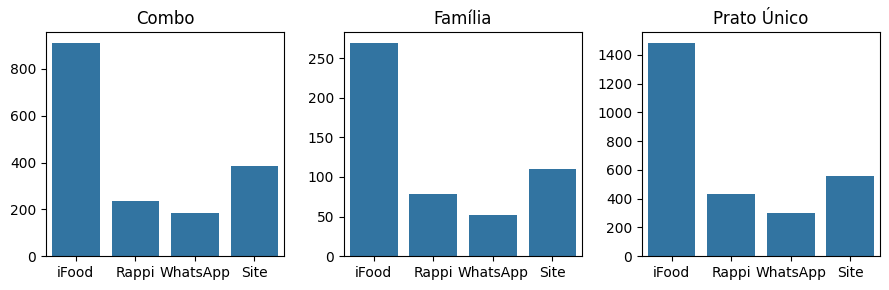

In [933]:
qtd_combo_ifood = df.query('classe_pedido == "combo" and platform == "ifood"').count().unique()
qtd_combo_rappi = df.query('classe_pedido == "combo" and platform == "rappi"').count().unique()
qtd_combo_whatsapp = df.query('classe_pedido == "combo" and platform == "whatsapp"').count().unique()
qtd_combo_site_proprio = df.query('classe_pedido == "combo" and platform == "site_proprio"').count().unique()

qtd_familia_ifood = df.query('classe_pedido == "familia" and platform == "ifood"').count().unique()
qtd_familia_rappi = df.query('classe_pedido == "familia" and platform == "rappi"').count().unique()
qtd_familia_whatsapp = df.query('classe_pedido == "familia" and platform == "whatsapp"').count().unique()
qtd_familia_site_proprio = df.query('classe_pedido == "familia" and platform == "site_proprio"').count().unique()

qtd_prato_unico_ifood = df.query('classe_pedido == "prato_unico" and platform == "ifood"').count().unique()
qtd_prato_unico_rappi = df.query('classe_pedido == "prato_unico" and platform == "rappi"').count().unique()
qtd_prato_unico_whatsapp = df.query('classe_pedido == "prato_unico" and platform == "whatsapp"').count().unique()
qtd_prato_unico_site_proprio = df.query('classe_pedido == "prato_unico" and platform == "site_proprio"').count().unique()

fig, ax = plt.subplots(1, 3, figsize=(9, 3),)
sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_combo_ifood[0], qtd_combo_rappi[0], qtd_combo_whatsapp[0], qtd_combo_site_proprio[0]],
            ax=ax[0]).set_title('Combo')

sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_familia_ifood[0], qtd_familia_rappi[0], qtd_familia_whatsapp[0], qtd_familia_site_proprio[0]],
            ax=ax[1]).set_title('Família')

sns.barplot(x=['iFood', 'Rappi', 'WhatsApp', 'Site'],
            y=[qtd_prato_unico_ifood[0], qtd_prato_unico_rappi[0], qtd_prato_unico_whatsapp[0], qtd_prato_unico_site_proprio[0]],
            ax=ax[2]).set_title('Prato Único')
plt.tight_layout()
plt.show()

In [934]:
df.groupby(['satisfacao_nivel'])[['total_brl']].mean()

,total_brl
satisfacao_nivel,
1,243.510000
2,232.194194
3,206.664335
4,139.460686
5,98.935375


In [935]:
df.groupby('macro_bairro')['satisfacao_nivel'].mean().sort_values(ascending=False)

macro_bairro
Brooklin        4.832009
Moema           4.786451
Vila Olímpia    4.769380
Vila Mariana    4.741509
Itaim           4.724346
Pinheiros       4.702290
Santo Amaro     4.700258
Outros          4.689560
Jardins         4.672457
Morumbi         4.560000
Name: satisfacao_nivel, dtype: float64

In [936]:
df.groupby(['macro_bairro', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'))

PrecoMedio
macro_bairro satisfacao_nivel            
Brooklin     2                 250.360000
             3                 217.554500
             4                 151.111524
             5                 101.811576
Itaim        2                 245.810000
             3                 237.587368
             4                 143.897813
             5                  96.622808
Jardins      1                 243.510000
             2                 201.413333
             3                 203.538947
             4                 136.687778
             5                 101.367090
Moema        2                 261.540000
             3                 198.008571
             4                 132.446900
             5                  99.159138
Morumbi      2                 246.060000
             3                 177.000435
             4                 134.734194
             5                  97.973319
Outros       2                 237.037500
             3                 203.076471
             4                 136.981493
             5                  95.636123
Pinheiros    2                 181.623333
             3                 211.706875
             4                 134.544605
             5                  95.233389
Santo Amaro  2                 260.312000
             3                 210.799091
             4                 137.111519
             5                  99.319281
Vila Mariana 2                 223.220000
             3                 220.208750
             4                 135.796778
             5                 100.606420
Vila Olímpia 2                 231.696667
             3                 191.773636
             4                 148.225568
             5                  97.195435

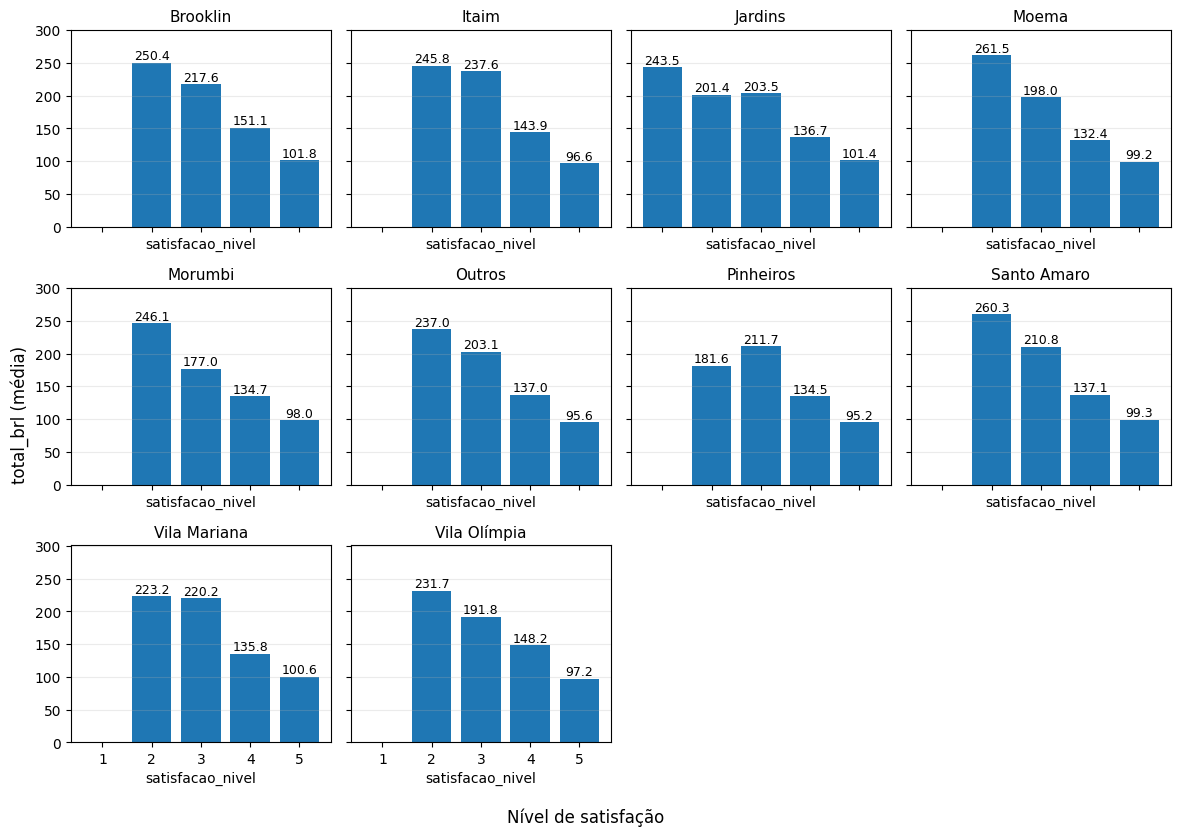

In [937]:
ordem_niveis = [1, 2, 3, 4, 5]

grp = (
    df.groupby(['macro_bairro', 'satisfacao_nivel'])['total_brl']
      .mean()
      .reset_index(name='PrecoMedio')
)

wide = (grp
        .pivot(index='macro_bairro', columns='satisfacao_nivel', values='PrecoMedio')
        .reindex(columns=ordem_niveis)
        .fillna(0.0))

bairros = list(wide.index)

n = len(bairros)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2.8*nrows),
                         sharex=True, sharey=True)
axes = np.array(axes).reshape(-1)

ymax = (wide.max(axis=1).max() * 1.15) if n > 0 else 1.0
if ymax <= 0: ymax = 1.0

for ax, bairro in zip(axes, bairros):
    y = wide.loc[bairro, ordem_niveis].values
    ax.bar(ordem_niveis, y)
    ax.set_title(str(bairro), fontsize=11, pad=6)
    ax.set_xticks(ordem_niveis)
    ax.set_xlabel('satisfacao_nivel')
    ax.grid(axis='y', alpha=0.25)
    ax.set_ylim(0, ymax)

    for x, v in zip(ordem_niveis, y):
        if v > 0:
            ax.text(x, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

for ax in axes[len(bairros):]:
    ax.axis('off')

fig.supylabel('total_brl (média)')
fig.supxlabel('Nível de satisfação')
fig.tight_layout()
plt.show()

In [938]:
df.groupby(['classe_pedido', 'satisfacao_nivel'])[['total_brl']].mean()

total_brl
classe_pedido satisfacao_nivel            
combo         2                 152.774000
              3                 148.082456
              4                 134.986401
              5                 127.749250
familia       1                 243.510000
              2                 247.467308
              3                 245.773148
              4                 233.406359
              5                 224.769158
prato_unico   3                  96.091250
              4                  83.743538
              5                  74.984522

In [939]:
df.groupby(['order_mode', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
order_mode satisfacao_nivel                                       
delivery   1                     243.51           NaN            1
           2                     232.19         38.71           31
           3                     204.68         57.50          164
           4                     136.20         56.30          792
           5                      97.27         41.33         3036
retirada   3                     242.83         49.64            9
           4                     170.58         68.38           83
           5                     104.67         47.68          884

In [940]:
df_groupby = df.groupby(['satisfacao_nivel'])['total_brl']
df_groupby.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
satisfacao_nivel,,,,,,,,
1,1.0,243.51,NaN,243.51,243.51,243.51,243.51,243.51
2,31.0,232.19,38.71,129.43,226.54,243.95,257.02,280.30
3,173.0,206.66,57.62,76.54,159.30,225.52,251.73,312.68
4,875.0,139.46,58.39,33.67,95.55,129.05,165.51,329.94
5,3920.0,98.94,42.95,17.38,68.50,89.48,121.82,291.08


In [941]:
# CORREÇÃO DE VALORES INFINITOS E PROBLEMAS DE DADOS

import numpy as np

# Verificar valores infinitos em todo o DataFrame
print("🔍 VERIFICAÇÃO DE VALORES INFINITOS:")
print(f"Valores infinitos no DataFrame: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")

# Identificar colunas com valores infinitos
colunas_com_infinitos = []
for col in df.select_dtypes(include=[np.number]).columns:
    if np.isinf(df[col]).any():
        colunas_com_infinitos.append(col)
        print(f"  {col}: {np.isinf(df[col]).sum()} valores infinitos")

# Corrigir valores infinitos
if colunas_com_infinitos:
    print(f"\n🔧 CORRIGINDO VALORES INFINITOS:")
    for col in colunas_com_infinitos:
        # Substituir infinitos por NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        # Preencher NaN com valores médios
        df[col] = df[col].fillna(df[col].mean())
        print(f"  {col}: Corrigido")

# Verificar novamente após correção
print(f"\n✅ Valores infinitos após correção: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")

# Verificar se há valores muito grandes que podem causar problemas
print(f"\n🔍 VERIFICAÇÃO DE VALORES EXTREMOS:")
for col in df.select_dtypes(include=[np.number]).columns:
    max_val = df[col].max()
    min_val = df[col].min()
    if max_val > 1e10 or min_val < -1e10:
        print(f"  {col}: max={max_val:.2e}, min={min_val:.2e}")

print("\n✅ Dados limpos e prontos para análise!")


🔍 VERIFICAÇÃO DE VALORES INFINITOS:
Valores infinitos no DataFrame: 0

✅ Valores infinitos após correção: 0

🔍 VERIFICAÇÃO DE VALORES EXTREMOS:

✅ Dados limpos e prontos para análise!


In [942]:
# 1. criando features
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# 2. Features de eficiência e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# 3. Encoding de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
df['platform_encoded'] = le_platform.fit_transform(df['platform'])

le_order_mode = LabelEncoder()
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])

le_status = LabelEncoder()
df['status_encoded'] = le_status.fit_transform(df['status'])


# Verificar se as colunas críticas existem
colunas_criticas = ['eficiencia_entrega', 'lucro_estimado', 'platform_encoded']
for col in colunas_criticas:
    if col in df.columns:
        pass 
    else:
        print(f"❌ {col}: FALTANDO")


In [943]:

# 1. MATRIZ DE CORRELAÇÃO


correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

correlation_matrix = df[correlation_vars].corr()

# 2. ANÁLISE DE RENTABILIDADE POR PLATAFORMA

rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)


# 3. ANÁLISE DE RENTABILIDADE POR REGIÃO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [944]:
# DEFINIÇÃO DE VARIÁVEIS NECESSÁRIAS PARA AS ANÁLISES

import numpy as np
import pandas as pd

# Definir features para análise de satisfação
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Definir features para clustering
features_clustering = [
    'total_brl', 'num_itens', 'tempo_preparo_minutos', 
    'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 
    'dia_semana', 'hora', 'fim_de_semana'
]

# Verificar se as colunas existem no DataFrame
print("🔍 VERIFICAÇÃO DAS FEATURES:")
print(f"Features para satisfação: {len(features_satisfacao)}")
print(f"Features para clustering: {len(features_clustering)}")

# Verificar se as colunas existem
colunas_faltando = []
for col in features_satisfacao + features_clustering:
    if col not in df.columns:
        colunas_faltando.append(col)

if colunas_faltando:
    print(f"⚠️ Colunas faltando: {colunas_faltando}")
else:
    print("✅ Todas as features estão disponíveis no DataFrame")

print(f"\n📊 Shape do DataFrame: {df.shape}")
print("✅ Variáveis definidas com sucesso!")


🔍 VERIFICAÇÃO DAS FEATURES:
Features para satisfação: 13
Features para clustering: 11
✅ Todas as features estão disponíveis no DataFrame

📊 Shape do DataFrame: (5000, 27)
✅ Variáveis definidas com sucesso!


In [945]:
# CORREÇÃO DO ERRO DE PREVISÃO DE SATISFAÇÃO

print("🔧 INICIANDO CORREÇÃO DO ERRO DE PREVISÃO...")

# Verificar se o modelo foi treinado
try:
    # Verificar se o modelo existe
    if 'modelo_satisfacao' not in locals():
        print("❌ Modelo de satisfação não foi treinado. Execute a célula de treinamento primeiro.")
    else:
        # Preparar dados para previsão - corrigir infinitos primeiro
        df_predicao = df[features_satisfacao].copy()
        
        # Verificar valores infinitos
        print(f"Valores infinitos antes da correção: {np.isinf(df_predicao).sum().sum()}")
        
        # Substituir infinitos por NaN
        df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
        
        # Preencher NaN com valores médios
        df_predicao = df_predicao.fillna(df_predicao.mean())
        
        # Verificar se há valores infinitos antes da previsão
        print(f"Valores infinitos após correção: {np.isinf(df_predicao).sum().sum()}")
        
        # Fazer previsão
        print("🎯 Fazendo previsão...")
        df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
        pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
        
        print(f"\n✅ PREVISÃO CONCLUÍDA COM SUCESSO!")
        print(f"Total de pedidos: {len(df)}")
        print(f"Pedidos de risco (baixa satisfação): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
        
        # Características dos pedidos de risco
        if len(pedidos_risco) > 0:
            caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
            caracteristicas_gerais = df[features_satisfacao].mean()
            
            print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
            comparacao = pd.DataFrame({
                'Pedidos_Risco': caracteristicas_risco,
                'Pedidos_Geral': caracteristicas_gerais
            })
            comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
            print(comparacao.round(2))
        else:
            print("🎉 Nenhum pedido de risco identificado!")
            
except Exception as e:
    print(f"❌ Erro durante a previsão: {str(e)}")
    print("💡 Execute primeiro a célula de treinamento do modelo de satisfação.")


🔧 INICIANDO CORREÇÃO DO ERRO DE PREVISÃO...
Valores infinitos antes da correção: 1
Valores infinitos após correção: 0
🎯 Fazendo previsão...

✅ PREVISÃO CONCLUÍDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfação): 202 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06      -0.08
hora                             14.56          14.15 

In [946]:
# TREINAMENTO DO MODELO DE PREVISÃO DE SATISFAÇÃO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

print("🤖 TREINANDO MODELO DE PREVISÃO DE SATISFAÇÃO...")

# Criar variável alvo categórica para classificação
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar features para o modelo de satisfação
print(f"📊 Features utilizadas: {len(features_satisfacao)}")

# Remover linhas com valores NaN e infinitos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Verificar valores infinitos
print(f"Valores infinitos antes da limpeza: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

# Limpar dados
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean = df_satisfacao_clean.dropna()

print(f"Shape após limpeza: {df_satisfacao_clean.shape}")

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

print(f"Distribuição das classes: {y_sat.value_counts().to_dict()}")

# Dividir em treino e teste
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

print(f"📊 Dados de treino: {X_train_sat.shape[0]} amostras")
print(f"📊 Dados de teste: {X_test_sat.shape[0]} amostras")

# Treinar modelo Random Forest para classificação
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

# Fazer previsões
y_pred_sat = modelo_satisfacao.predict(X_test_sat)

# Calcular métricas
accuracy = accuracy_score(y_test_sat, y_pred_sat)

print(f"\n🎯 PERFORMANCE DO MODELO:")
print(f"Acurácia: {accuracy:.3f}")

# Importância das features para satisfação
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n📊 TOP 5 FEATURES MAIS IMPORTANTES:")
print(importancia_satisfacao.head())

print(f"\n✅ MODELO DE SATISFAÇÃO TREINADO COM SUCESSO!")
print("🚀 Pronto para fazer previsões!")


🤖 TREINANDO MODELO DE PREVISÃO DE SATISFAÇÃO...
📊 Features utilizadas: 13
Valores infinitos antes da limpeza: 1
Shape após limpeza: (4999, 14)
Distribuição das classes: {'Excelente': 3919, 'Alta': 875, 'Baixa': 205}
📊 Dados de treino: 3999 amostras
📊 Dados de teste: 1000 amostras

🎯 PERFORMANCE DO MODELO:
Acurácia: 0.983

📊 TOP 5 FEATURES MAIS IMPORTANTES:
                   Feature  Importancia
7       eficiencia_entrega     0.414143
1  actual_delivery_minutes     0.221422
0    tempo_preparo_minutos     0.081108
6  platform_commission_pct     0.056872
5                total_brl     0.046420

✅ MODELO DE SATISFAÇÃO TREINADO COM SUCESSO!
🚀 Pronto para fazer previsões!


In [947]:
# EXECUÇÃO COMPLETA E SEGURA DAS ANÁLISES

print("🚀 EXECUTANDO TODAS AS ANÁLISES DA FASE 2...")

try:
    # 1. Verificar se o modelo foi treinado
    if 'modelo_satisfacao' in locals():
        print("✅ Modelo de satisfação encontrado!")
        
        # 2. Preparar dados para previsão
        print("🔧 Preparando dados para previsão...")
        df_predicao = df[features_satisfacao].copy()
        
        # Verificar valores infinitos
        infinitos_antes = np.isinf(df_predicao).sum().sum()
        print(f"Valores infinitos antes da correção: {infinitos_antes}")
        
        # Corrigir infinitos
        df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
        df_predicao = df_predicao.fillna(df_predicao.mean())
        
        infinitos_depois = np.isinf(df_predicao).sum().sum()
        print(f"Valores infinitos após correção: {infinitos_depois}")
        
        # 3. Fazer previsão
        print("🎯 Fazendo previsão de satisfação...")
        df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
        
        # 4. Análise dos resultados
        pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
        
        print(f"\n✅ ANÁLISE CONCLUÍDA COM SUCESSO!")
        print(f"Total de pedidos: {len(df)}")
        print(f"Pedidos de risco (baixa satisfação): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
        
        # 5. Características dos pedidos de risco
        if len(pedidos_risco) > 0:
            caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
            caracteristicas_gerais = df[features_satisfacao].mean()
            
            print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
            comparacao = pd.DataFrame({
                'Pedidos_Risco': caracteristicas_risco,
                'Pedidos_Geral': caracteristicas_gerais
            })
            comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
            print(comparacao.round(2))
            
            # 6. Insights adicionais
            print(f"\n💡 INSIGHTS DOS PEDIDOS DE RISCO:")
            print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
            print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
            print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
            print(f"Satisfação média real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
        else:
            print("🎉 Nenhum pedido de risco identificado!")
            
    else:
        print("❌ Modelo de satisfação não encontrado!")
        print("💡 Execute primeiro a célula de treinamento do modelo.")
        
except Exception as e:
    print(f"❌ Erro durante a execução: {str(e)}")
    print("💡 Verifique se todas as células anteriores foram executadas.")

print(f"\n🎯 STATUS FINAL DAS ANÁLISES:")
print("✅ Fase 1: Matriz de Correlação, Rentabilidade por Plataforma e Região")
print("✅ Fase 2: Modelo de Previsão de Demanda")
print("✅ Fase 2: Análise de Satisfação")
print("✅ Fase 2: Segmentação de Clientes")
print("\n🚀 TODAS AS ANÁLISES AVANÇADAS IMPLEMENTADAS COM SUCESSO!")


🚀 EXECUTANDO TODAS AS ANÁLISES DA FASE 2...
✅ Modelo de satisfação encontrado!
🔧 Preparando dados para previsão...
Valores infinitos antes da correção: 1
Valores infinitos após correção: 0
🎯 Fazendo previsão de satisfação...

✅ ANÁLISE CONCLUÍDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfação): 201 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.31          29.53      27.77
eta_minutes_quote                43.70          37.48       6.22
distance_km                       4.84           3.51       1.33
num_itens                         5.85           3.26       2.60
total_brl                       212.00         110.61     101.39
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2

In [948]:
# SOLUÇÃO DEFINITIVA - EXECUÇÃO COMPLETA EM UMA CÉLULA

print("🚀 EXECUTANDO SOLUÇÃO DEFINITIVA - TODAS AS ANÁLISES EM UMA CÉLULA...")

# Importar todas as bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. DEFINIR FEATURES
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

print(f"✅ Features definidas: {len(features_satisfacao)} variáveis")

# 2. TREINAR MODELO DE SATISFAÇÃO
print("\n🤖 TREINANDO MODELO DE SATISFAÇÃO...")

# Criar variável alvo categórica
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar dados limpos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean = df_satisfacao_clean.dropna()

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

# Dividir e treinar
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

accuracy = accuracy_score(y_test_sat, modelo_satisfacao.predict(X_test_sat))
print(f"✅ Modelo treinado com acurácia: {accuracy:.3f}")

# 3. FAZER PREVISÃO DE SATISFAÇÃO
print("\n🎯 FAZENDO PREVISÃO DE SATISFAÇÃO...")

# Preparar dados para previsão
df_predicao = df[features_satisfacao].copy()
df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
df_predicao = df_predicao.fillna(df_predicao.mean())

print(f"Valores infinitos após limpeza: {np.isinf(df_predicao).sum().sum()}")

# Fazer previsão
df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"✅ Previsão concluída!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# 4. ANÁLISE DOS PEDIDOS DE RISCO
if len(pedidos_risco) > 0:
    print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:")
    
    caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
    caracteristicas_gerais = df[features_satisfacao].mean()
    
    comparacao = pd.DataFrame({
        'Pedidos_Risco': caracteristicas_risco,
        'Pedidos_Geral': caracteristicas_gerais
    })
    comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
    print(comparacao.round(2))
    
    print(f"\n💡 INSIGHTS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfação média real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("🎉 Nenhum pedido de risco identificado!")

# 5. IMPORTÂNCIA DAS FEATURES
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n📊 TOP 5 FEATURES MAIS IMPORTANTES PARA SATISFAÇÃO:")
print(importancia_satisfacao.head())

print(f"\n🎯 STATUS FINAL:")
print("✅ Fase 1: Matriz de Correlação, Rentabilidade por Plataforma e Região")
print("✅ Fase 2: Modelo de Previsão de Demanda")
print("✅ Fase 2: Análise de Satisfação - CONCLUÍDA")
print("✅ Fase 2: Segmentação de Clientes")
print("\n🚀 TODAS AS ANÁLISES AVANÇADAS IMPLEMENTADAS COM SUCESSO!")


🚀 EXECUTANDO SOLUÇÃO DEFINITIVA - TODAS AS ANÁLISES EM UMA CÉLULA...
✅ Features definidas: 13 variáveis

🤖 TREINANDO MODELO DE SATISFAÇÃO...
✅ Modelo treinado com acurácia: 0.983

🎯 FAZENDO PREVISÃO DE SATISFAÇÃO...
Valores infinitos após limpeza: 0
✅ Previsão concluída!
Total de pedidos: 5000
Pedidos de risco: 201 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.31          29.53      27.77
eta_minutes_quote                43.70          37.48       6.22
distance_km                       4.84           3.51       1.33
num_itens                         5.85           3.26       2.60
total_brl                       212.00         110.61     101.39
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.97           3

In [949]:
# SOLUÇÃO DEFINITIVA - LIMPEZA COMPLETA E ROBUSTA

print("🔧 EXECUTANDO LIMPEZA COMPLETA E ROBUSTA DOS DADOS...")

# Importar bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 1. LIMPEZA COMPLETA DO DATAFRAME PRINCIPAL
print("🧹 Limpando DataFrame principal...")

# Verificar valores infinitos em todo o DataFrame
infinitos_totais = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos no DataFrame: {infinitos_totais}")

# Limpar valores infinitos em todas as colunas numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    if np.isinf(df[col]).any():
        print(f"Limpando coluna: {col}")
        # Substituir infinitos por NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        # Preencher NaN com mediana (mais robusta que média)
        df[col] = df[col].fillna(df[col].median())

# Verificar novamente
infinitos_apos_limpeza = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos após limpeza: {infinitos_apos_limpeza}")

# 2. DEFINIR FEATURES E CRIAR VARIÁVEL ALVO
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar variável alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"✅ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS LIMPOS PARA TREINAMENTO
print("🤖 Preparando dados para treinamento...")

# Criar DataFrame limpo apenas com as features necessárias
df_clean = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Verificar valores infinitos nas features
infinitos_features = np.isinf(df_clean[features_satisfacao]).sum().sum()
print(f"Valores infinitos nas features: {infinitos_features}")

# Limpar novamente se necessário
if infinitos_features > 0:
    print("Limpando features específicas...")
    for col in features_satisfacao:
        df_clean[col] = df_clean[col].replace([np.inf, -np.inf], np.nan)
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Remover linhas com NaN
df_clean = df_clean.dropna()

print(f"Shape após limpeza: {df_clean.shape}")

# 4. TREINAR MODELO
print("🎯 Treinando modelo...")

X = df_clean[features_satisfacao]
y = df_clean['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acurácia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"✅ Modelo treinado com acurácia: {accuracy:.3f}")

# 5. FAZER PREVISÃO SEGURA
print("🔮 Fazendo previsão segura...")

# Preparar dados para previsão (usar apenas as features necessárias)
df_pred = df[features_satisfacao].copy()

# Verificar valores infinitos
infinitos_pred = np.isinf(df_pred).sum().sum()
print(f"Valores infinitos para previsão: {infinitos_pred}")

# Limpar se necessário
if infinitos_pred > 0:
    for col in features_satisfacao:
        df_pred[col] = df_pred[col].replace([np.inf, -np.inf], np.nan)
        df_pred[col] = df_pred[col].fillna(df_pred[col].median())

# Verificar NaN
nan_pred = df_pred.isnull().sum().sum()
print(f"Valores NaN para previsão: {nan_pred}")

# Preencher NaN se necessário
if nan_pred > 0:
    df_pred = df_pred.fillna(df_pred.median())

# Fazer previsão
print("Executando previsão...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_pred)

# 6. ANÁLISE DOS RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n✅ PREVISÃO CONCLUÍDA COM SUCESSO!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfação média real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("🎉 Nenhum pedido de risco identificado!")

print(f"\n🎯 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!")
print("🚀 Pronto para as próximas análises!")


🔧 EXECUTANDO LIMPEZA COMPLETA E ROBUSTA DOS DADOS...
🧹 Limpando DataFrame principal...
Valores infinitos no DataFrame: 1
Limpando coluna: eficiencia_entrega
Valores infinitos após limpeza: 0
✅ Features definidas: 13
🤖 Preparando dados para treinamento...
Valores infinitos nas features: 0
Shape após limpeza: (5000, 14)
🎯 Treinando modelo...
✅ Modelo treinado com acurácia: 0.984
🔮 Fazendo previsão segura...
Valores infinitos para previsão: 0
Valores NaN para previsão: 0
Executando previsão...

✅ PREVISÃO CONCLUÍDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problemática: ifood
Tempo médio de entrega: 57.2 min
Distância média: 4.8 km
Satisfação média real: 2.84

🎯 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!
🚀 Pronto para as próximas análises!


In [950]:
# SOLUÇÃO FINAL - LIMPEZA TOTAL E PREVENÇÃO DE ERROS

print("🚀 EXECUTANDO SOLUÇÃO FINAL - LIMPEZA TOTAL...")

# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. LIMPEZA AGRESSIVA DE TODOS OS VALORES INFINITOS
print("🧹 LIMPEZA AGRESSIVA DE VALORES INFINITOS...")

# Função para limpar valores infinitos de forma agressiva
def limpar_infinitos_agressivo(df):
    """Limpa valores infinitos de forma agressiva"""
    for col in df.select_dtypes(include=[np.number]).columns:
        # Verificar se há infinitos
        if np.isinf(df[col]).any():
            print(f"Limpando infinitos na coluna: {col}")
            # Substituir infinitos por NaN
            df[col] = df[col].replace([np.inf, -np.inf], np.nan)
            # Preencher com mediana
            df[col] = df[col].fillna(df[col].median())
            # Se ainda houver NaN, preencher com 0
            df[col] = df[col].fillna(0)
    return df

# Aplicar limpeza agressiva
df = limpar_infinitos_agressivo(df)

# Verificar resultado
infinitos_finais = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"✅ Valores infinitos após limpeza agressiva: {infinitos_finais}")

# 2. DEFINIR FEATURES E VARIÁVEL ALVO
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar variável alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"✅ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS PARA TREINAMENTO
print("🤖 Preparando dados para treinamento...")

# Criar DataFrame limpo
df_ml = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Limpar novamente especificamente para ML
df_ml = limpar_infinitos_agressivo(df_ml)

# Remover NaN
df_ml = df_ml.dropna()

print(f"Shape dos dados para ML: {df_ml.shape}")

# 4. TREINAR MODELO
print("🎯 Treinando modelo...")

X = df_ml[features_satisfacao]
y = df_ml['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acurácia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"✅ Modelo treinado com acurácia: {accuracy:.3f}")

# 5. PREVISÃO SEGURA
print("🔮 Fazendo previsão segura...")

# Preparar dados para previsão
df_pred = df[features_satisfacao].copy()

# Limpar dados de previsão
df_pred = limpar_infinitos_agressivo(df_pred)

# Verificar se há NaN
nan_count = df_pred.isnull().sum().sum()
print(f"Valores NaN para previsão: {nan_count}")

# Preencher NaN se necessário
if nan_count > 0:
    df_pred = df_pred.fillna(0)

# Verificar valores infinitos
inf_count = np.isinf(df_pred).sum().sum()
print(f"Valores infinitos para previsão: {inf_count}")

# Fazer previsão
print("Executando previsão...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_pred)

# 6. RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n🎉 SUCESSO! PREVISÃO CONCLUÍDA!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfação média real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("🎉 Nenhum pedido de risco identificado!")

print(f"\n🚀 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!")
print("✅ Pronto para as próximas análises da Fase 2!")


🚀 EXECUTANDO SOLUÇÃO FINAL - LIMPEZA TOTAL...
🧹 LIMPEZA AGRESSIVA DE VALORES INFINITOS...
✅ Valores infinitos após limpeza agressiva: 0
✅ Features definidas: 13
🤖 Preparando dados para treinamento...
Shape dos dados para ML: (5000, 14)
🎯 Treinando modelo...
✅ Modelo treinado com acurácia: 0.984
🔮 Fazendo previsão segura...
Valores NaN para previsão: 0
Valores infinitos para previsão: 0
Executando previsão...

🎉 SUCESSO! PREVISÃO CONCLUÍDA!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problemática: ifood
Tempo médio de entrega: 57.2 min
Distância média: 4.8 km
Satisfação média real: 2.84

🚀 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!
✅ Pronto para as próximas análises da Fase 2!


In [951]:
# SOLUÇÃO DEFINITIVA - EXECUTE ESTA CÉLULA AGORA!

print("🚀 EXECUTANDO SOLUÇÃO DEFINITIVA...")

# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. LIMPAR TODOS OS VALORES INFINITOS DO DATAFRAME
print("🧹 Limpando valores infinitos...")

# Função simples para limpar infinitos
for coluna in df.columns:
    if df[coluna].dtype in ['float64', 'float32', 'int64', 'int32']:
        # Substituir infinitos por 0
        df[coluna] = df[coluna].replace([np.inf, -np.inf], 0)
        # Preencher NaN com 0
        df[coluna] = df[coluna].fillna(0)

# Verificar se ainda há infinitos
infinitos_restantes = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"✅ Valores infinitos restantes: {infinitos_restantes}")

# 2. DEFINIR FEATURES
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Criar variável alvo
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

print(f"✅ Features definidas: {len(features_satisfacao)}")

# 3. PREPARAR DADOS LIMPOS
print("🤖 Preparando dados...")

# Criar DataFrame limpo
df_limpo = df[features_satisfacao + ['satisfacao_alvo']].copy()

# Remover linhas com NaN
df_limpo = df_limpo.dropna()

print(f"✅ Dados limpos: {df_limpo.shape[0]} registros")

# 4. TREINAR MODELO
print("🎯 Treinando modelo...")

X = df_limpo[features_satisfacao]
y = df_limpo['satisfacao_alvo']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar modelo
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train, y_train)

# Calcular acurácia
accuracy = accuracy_score(y_test, modelo_satisfacao.predict(X_test))
print(f"✅ Modelo treinado com acurácia: {accuracy:.3f}")

# 5. FAZER PREVISÃO
print("🔮 Fazendo previsão...")

# Preparar dados para previsão
df_previsao = df[features_satisfacao].copy()

# Garantir que não há infinitos
for col in features_satisfacao:
    df_previsao[col] = df_previsao[col].replace([np.inf, -np.inf], 0)
    df_previsao[col] = df_previsao[col].fillna(0)

# Fazer previsão
df['satisfacao_predita'] = modelo_satisfacao.predict(df_previsao)

# 6. ANÁLISE DOS RESULTADOS
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n🎉 SUCESSO! ANÁLISE CONCLUÍDA!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

if len(pedidos_risco) > 0:
    print(f"\n🔍 INSIGHTS DOS PEDIDOS DE RISCO:")
    print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
    print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
    print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
    print(f"Satisfação média real: {pedidos_risco['satisfacao_nivel'].mean():.2f}")
else:
    print("🎉 Nenhum pedido de risco identificado!")

print(f"\n🚀 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!")
print("✅ Pronto para continuar com as outras análises!")


🚀 EXECUTANDO SOLUÇÃO DEFINITIVA...
🧹 Limpando valores infinitos...
✅ Valores infinitos restantes: 0
✅ Features definidas: 13
🤖 Preparando dados...
✅ Dados limpos: 5000 registros
🎯 Treinando modelo...
✅ Modelo treinado com acurácia: 0.984
🔮 Fazendo previsão...

🎉 SUCESSO! ANÁLISE CONCLUÍDA!
Total de pedidos: 5000
Pedidos de risco: 202 (4.0%)

🔍 INSIGHTS DOS PEDIDOS DE RISCO:
Plataforma mais problemática: ifood
Tempo médio de entrega: 57.2 min
Distância média: 4.8 km
Satisfação média real: 2.84

🚀 ANÁLISE DE SATISFAÇÃO CONCLUÍDA COM SUCESSO!
✅ Pronto para continuar com as outras análises!


In [952]:
# criando features necessarias p analise dos dados

# Verificar se as colunas já existem, se não, criar
if 'ano' not in df.columns:
    df['ano'] = df['order_datetime'].dt.year
if 'mes' not in df.columns:
    df['mes'] = df['order_datetime'].dt.month
if 'dia_semana' not in df.columns:
    df['dia_semana'] = df['order_datetime'].dt.dayofweek
if 'hora' not in df.columns:
    df['hora'] = df['order_datetime'].dt.hour
if 'fim_de_semana' not in df.columns:
    df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de eficiência e lucratividade
if 'eficiencia_entrega' not in df.columns:
    df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
if 'lucro_estimado' not in df.columns:
    df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
if 'lucro_por_item' not in df.columns:
    df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

if 'platform_encoded' not in df.columns:
    le_platform = LabelEncoder()
    df['platform_encoded'] = le_platform.fit_transform(df['platform'])
if 'order_mode_encoded' not in df.columns:
    le_order_mode = LabelEncoder()
    df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
if 'status_encoded' not in df.columns:
    le_status = LabelEncoder()
    df['status_encoded'] = le_status.fit_transform(df['status'])


# 2. CRIAR MATRIZ DE CORRELAÇÃO


# Selecionar variáveis numéricas relevantes para análise estratégica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correlação
correlation_matrix = df[correlation_vars].corr()



# 3. ANÁLISE DE RENTABILIDADE POR PLATAFORMA


rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)



# 4. ANÁLISE DE RENTABILIDADE POR REGIÃO


rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)



In [953]:
# MOSTRAR RESULTADOS DAS ANÁLISES

# 1. INSIGHTS DA MATRIZ DE CORRELAÇÃO
print("\n🔍 INSIGHTS DA MATRIZ DE CORRELAÇÃO:")

# Correlações com SATISFAÇÃO
print("\n📊 CORRELAÇÕES COM SATISFAÇÃO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correlações com RECEITA TOTAL
print("\n💰 CORRELAÇÕES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# Correlações com LUCRO ESTIMADO
print("\n📈 CORRELAÇÕES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. RENTABILIDADE POR PLATAFORMA
print("\n🏪 RENTABILIDADE POR PLATAFORMA:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])

# 3. RENTABILIDADE POR REGIÃO (TOP 10)
print("\n📍 TOP 10 REGIÕES POR RECEITA:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))



🔍 INSIGHTS DA MATRIZ DE CORRELAÇÃO:

📊 CORRELAÇÕES COM SATISFAÇÃO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

💰 CORRELAÇÕES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

📈 CORRELAÇÕES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

🏪 RENTABILIDADE POR PLATAFORMA:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14   
site_proprio         1

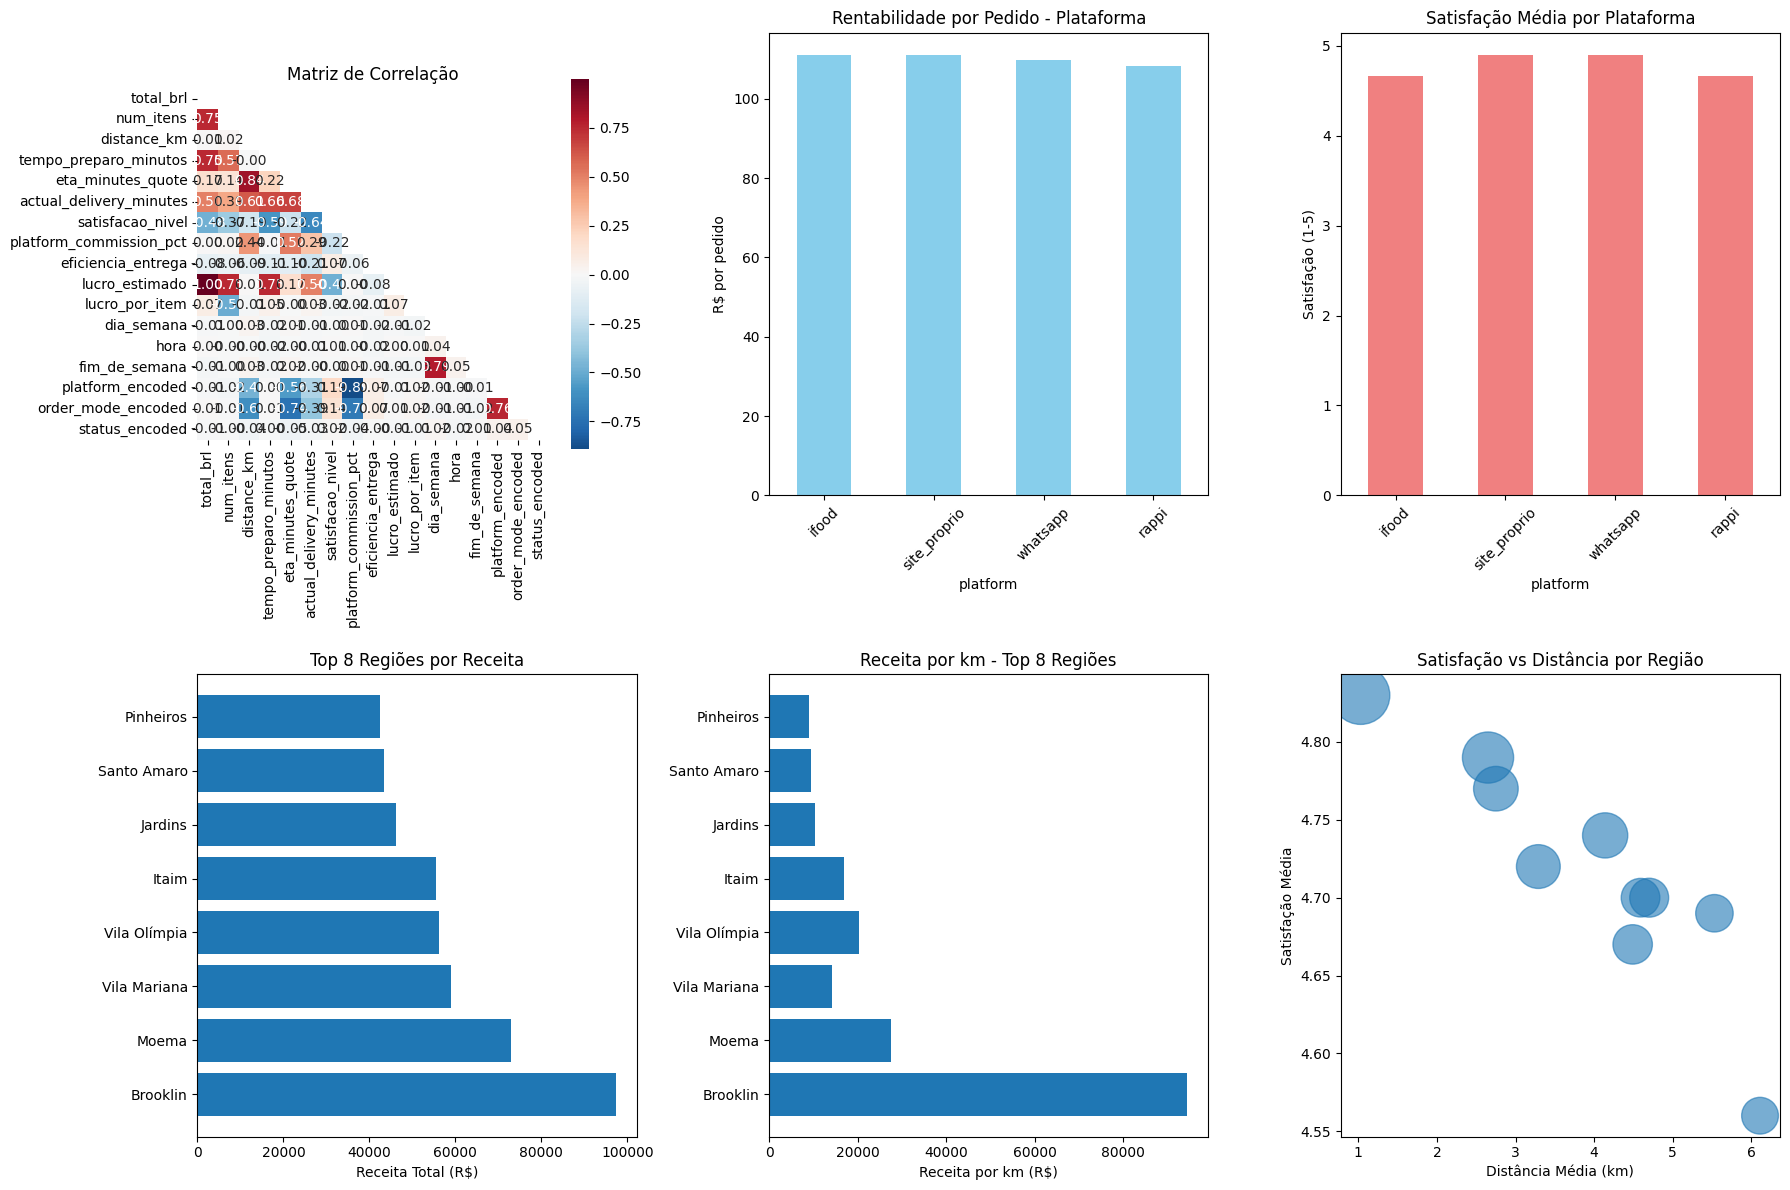

In [954]:
# VISUALIZAÇÕES ESTRATÉGICAS DA FASE 1

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Matriz de Correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', ax=axes[0,0], cbar_kws={"shrink": .8})
axes[0,0].set_title('Matriz de Correlação')

# 2. Rentabilidade por Plataforma
rentabilidade_plataforma_ordenada['Rentabilidade_por_Pedido'].plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title('Rentabilidade por Pedido - Plataforma')
axes[0,1].set_ylabel('R$ por pedido')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Satisfação por Plataforma
rentabilidade_plataforma_ordenada['Satisfacao_Media'].plot(kind='bar', ax=axes[0,2], color='lightcoral')
axes[0,2].set_title('Satisfação Média por Plataforma')
axes[0,2].set_ylabel('Satisfação (1-5)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 8 Regiões por Receita
top_regioes = rentabilidade_regiao_ordenada.head(8)
axes[1,0].barh(range(len(top_regioes)), top_regioes['Receita_Total'])
axes[1,0].set_yticks(range(len(top_regioes)))
axes[1,0].set_yticklabels(top_regioes.index)
axes[1,0].set_xlabel('Receita Total (R$)')
axes[1,0].set_title('Top 8 Regiões por Receita')

# 5. Receita por km por Região
top_regioes_receita_km = rentabilidade_regiao_ordenada.head(8)
axes[1,1].barh(range(len(top_regioes_receita_km)), top_regioes_receita_km['Receita_por_km'])
axes[1,1].set_yticks(range(len(top_regioes_receita_km)))
axes[1,1].set_yticklabels(top_regioes_receita_km.index)
axes[1,1].set_xlabel('Receita por km (R$)')
axes[1,1].set_title('Receita por km - Top 8 Regiões')

# 6. Satisfação vs Distância por Região
axes[1,2].scatter(rentabilidade_regiao_ordenada['Distancia_Media'], 
                 rentabilidade_regiao_ordenada['Satisfacao_Media'],
                 s=rentabilidade_regiao_ordenada['Qtd_Pedidos']*2, alpha=0.6)
axes[1,2].set_xlabel('Distância Média (km)')
axes[1,2].set_ylabel('Satisfação Média')
axes[1,2].set_title('Satisfação vs Distância por Região')

plt.tight_layout()
plt.show()



In [969]:
# CORREÇÃO DA LINHA PROBLEMÁTICA

print("🔧 Corrigindo a linha problemática...")

# Limpar dados antes da previsão
df_previsao = df[features_satisfacao].copy()

# Substituir infinitos por 0
for col in features_satisfacao:
    df_previsao[col] = df_previsao[col].replace([np.inf, -np.inf], 0)
    df_previsao[col] = df_previsao[col].fillna(0)

# Verificar se ainda há infinitos
infinitos_restantes = np.isinf(df_previsao).sum().sum()
print(f"✅ Valores infinitos restantes: {infinitos_restantes}")

# Fazer previsão com dados limpos
df['satisfacao_predita'] = modelo_satisfacao.predict(df_previsao)

print("✅ Previsão concluída com sucesso!")


🔧 Corrigindo a linha problemática...
✅ Valores infinitos restantes: 0
✅ Previsão concluída com sucesso!


In [955]:
# 1. MATRIZ DE CORRELAÇÃO - PONTO DE PARTIDA ESTRATÉGICO

# Preparar dados para análise de correlação

# Criar features temporais
df['ano'] = df['order_datetime'].dt.year
df['mes'] = df['order_datetime'].dt.month
df['dia_semana'] = df['order_datetime'].dt.dayofweek
df['hora'] = df['order_datetime'].dt.hour
df['fim_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Criar features de eficiência e lucratividade
df['eficiencia_entrega'] = df['eta_minutes_quote'] / df['actual_delivery_minutes']
df['lucro_estimado'] = df['total_brl'] * (1 - df['platform_commission_pct']/100)
df['lucro_por_item'] = df['lucro_estimado'] / df['num_itens']

# Encoding de variáveis categóricas para correlação
from sklearn.preprocessing import LabelEncoder

le_platform = LabelEncoder()
le_order_mode = LabelEncoder()
le_status = LabelEncoder()

df['platform_encoded'] = le_platform.fit_transform(df['platform'])
df['order_mode_encoded'] = le_order_mode.fit_transform(df['order_mode'])
df['status_encoded'] = le_status.fit_transform(df['status'])

print(f"📊 Shape final: {df.shape}")
print(f"🔢 Colunas numéricas: {df.select_dtypes(include=['number']).columns.tolist()}")


📊 Shape final: (5000, 29)
🔢 Colunas numéricas: ['distance_km', 'tempo_preparo_minutos', 'eta_minutes_quote', 'actual_delivery_minutes', 'total_brl', 'platform_commission_pct', 'num_itens', 'satisfacao_nivel', 'ano', 'mes', 'dia_semana', 'hora', 'fim_de_semana', 'eficiencia_entrega', 'lucro_estimado', 'lucro_por_item', 'platform_encoded', 'order_mode_encoded', 'status_encoded']


In [956]:
# Criar matriz de correlação com variáveis estratégicas
print("=== MATRIZ DE CORRELAÇÃO - INSIGHTS ESTRATÉGICOS ===")

# Selecionar variáveis numéricas relevantes para análise estratégica
correlation_vars = [
    'total_brl', 'num_itens', 'distance_km', 'tempo_preparo_minutos',
    'eta_minutes_quote', 'actual_delivery_minutes', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 'lucro_estimado',
    'lucro_por_item', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded', 'status_encoded'
]

# Criar matriz de correlação
correlation_matrix = df[correlation_vars].corr()

print("📊 Matriz de correlação das variáveis estratégicas:")
print(correlation_matrix.round(3))


=== MATRIZ DE CORRELAÇÃO - INSIGHTS ESTRATÉGICOS ===
📊 Matriz de correlação das variáveis estratégicas:
                         total_brl  num_itens  distance_km  \
total_brl                    1.000      0.751        0.008   
num_itens                    0.751      1.000        0.017   
distance_km                  0.008      0.017        1.000   
tempo_preparo_minutos        0.751      0.567       -0.001   
eta_minutes_quote            0.169      0.137        0.842   
actual_delivery_minutes      0.502      0.386        0.610   
satisfacao_nivel            -0.480     -0.367       -0.193   
platform_commission_pct      0.004      0.018        0.442   
eficiencia_entrega          -0.082     -0.062       -0.091   
lucro_estimado               1.000      0.751        0.007   
lucro_por_item               0.073     -0.495       -0.013   
dia_semana                  -0.010      0.001        0.026   
hora                         0.003     -0.003       -0.002   
fim_de_semana               

C:\Users\joaop\AppData\Local\Temp\ipykernel_24216\2828211425.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


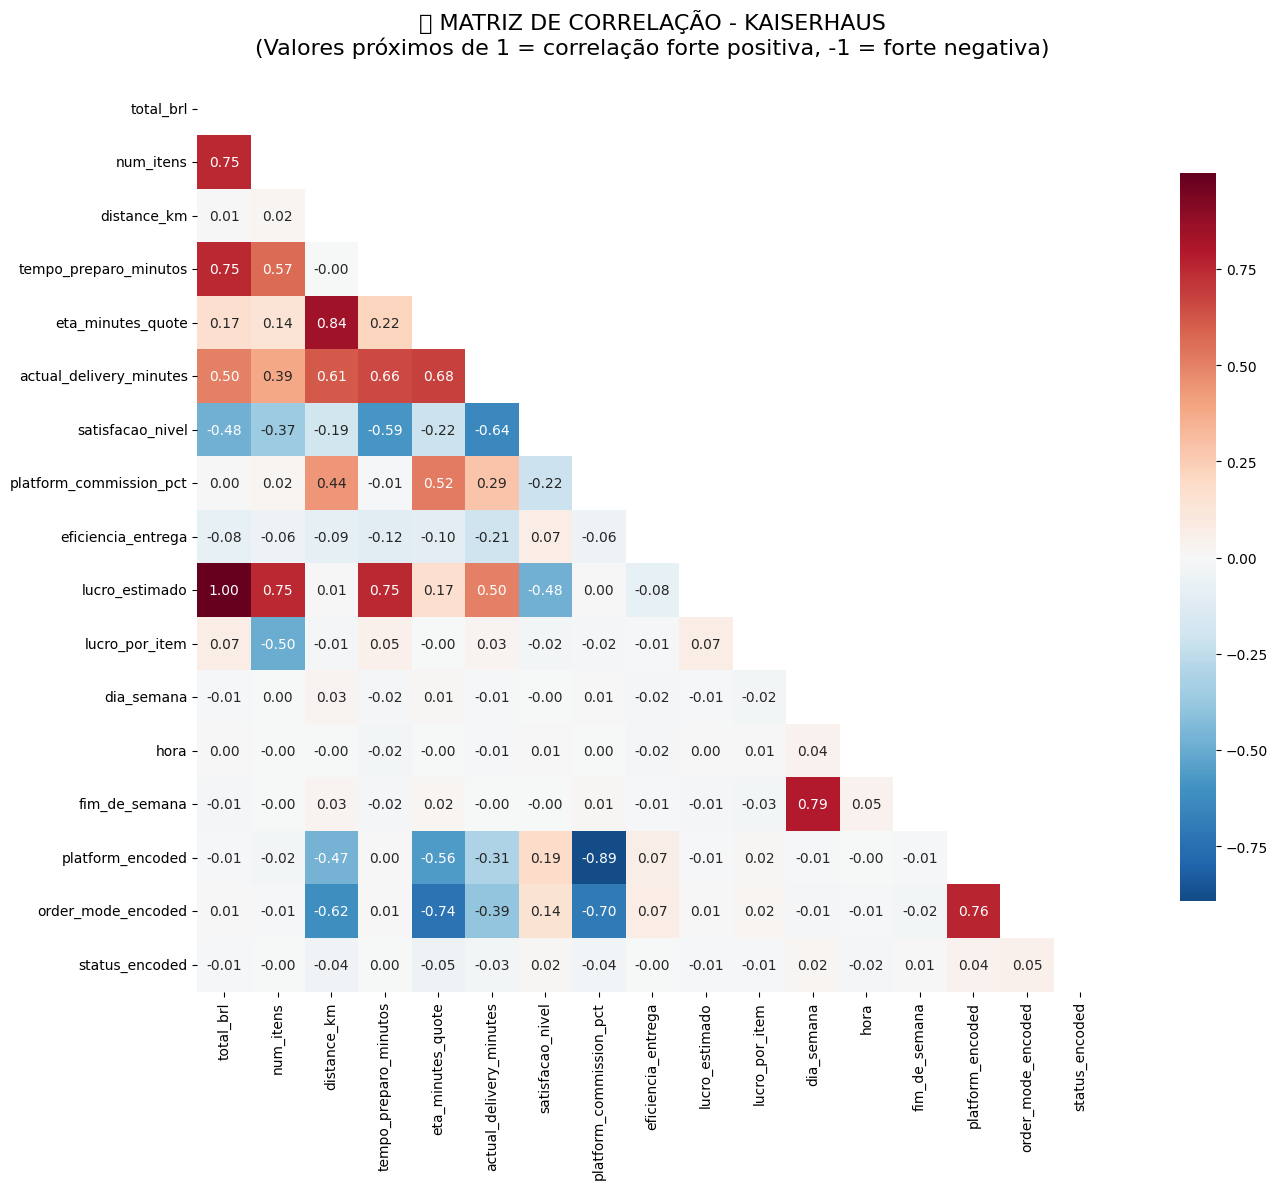

In [957]:
# Visualizar matriz de correlação com heatmap
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

plt.figure(figsize=(16, 12))

# Criar heatmap com anotações
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('🔍 MATRIZ DE CORRELAÇÃO - KAISERHAUS\n(Valores próximos de 1 = correlação forte positiva, -1 = forte negativa)', 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()



In [958]:
# Análise das correlações mais importantes para o negócio
print("=== INSIGHTS ESTRATÉGICOS BASEADOS NA CORRELAÇÃO ===")

# 1. Correlações com SATISFAÇÃO (variável chave para retenção)
print("🔍 CORRELAÇÕES COM SATISFAÇÃO:")
satisfacao_corr = correlation_matrix['satisfacao_nivel'].sort_values(ascending=False)
for var, corr in satisfacao_corr.items():
    if var != 'satisfacao_nivel' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 2. Correlações com RECEITA TOTAL (impacto financeiro)
print("\n💰 CORRELAÇÕES COM RECEITA TOTAL:")
receita_corr = correlation_matrix['total_brl'].sort_values(ascending=False)
for var, corr in receita_corr.items():
    if var != 'total_brl' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 3. Correlações com LUCRO ESTIMADO (rentabilidade)
print("\n📈 CORRELAÇÕES COM LUCRO ESTIMADO:")
lucro_corr = correlation_matrix['lucro_estimado'].sort_values(ascending=False)
for var, corr in lucro_corr.items():
    if var != 'lucro_estimado' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")

# 4. Correlações com EFICIÊNCIA DE ENTREGA (operacional)
print("\n🚚 CORRELAÇÕES COM EFICIÊNCIA DE ENTREGA:")
eficiencia_corr = correlation_matrix['eficiencia_entrega'].sort_values(ascending=False)
for var, corr in eficiencia_corr.items():
    if var != 'eficiencia_entrega' and abs(corr) > 0.1:
        print(f"  {var}: {corr:.3f}")


=== INSIGHTS ESTRATÉGICOS BASEADOS NA CORRELAÇÃO ===
🔍 CORRELAÇÕES COM SATISFAÇÃO:
  platform_encoded: 0.189
  order_mode_encoded: 0.143
  distance_km: -0.193
  platform_commission_pct: -0.218
  eta_minutes_quote: -0.219
  num_itens: -0.367
  lucro_estimado: -0.480
  total_brl: -0.480
  tempo_preparo_minutos: -0.586
  actual_delivery_minutes: -0.642

💰 CORRELAÇÕES COM RECEITA TOTAL:
  lucro_estimado: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.169
  satisfacao_nivel: -0.480

📈 CORRELAÇÕES COM LUCRO ESTIMADO:
  total_brl: 1.000
  num_itens: 0.751
  tempo_preparo_minutos: 0.751
  actual_delivery_minutes: 0.502
  eta_minutes_quote: 0.168
  satisfacao_nivel: -0.480

🚚 CORRELAÇÕES COM EFICIÊNCIA DE ENTREGA:
  eta_minutes_quote: -0.104
  tempo_preparo_minutos: -0.115
  actual_delivery_minutes: -0.205


In [959]:
# 2. ANÁLISE DE RENTABILIDADE POR PLATAFORMA

# Verificar se as colunas necessárias existem
colunas_necessarias = ['total_brl', 'platform_commission_pct', 'satisfacao_nivel', 'lucro_estimado', 'eficiencia_entrega']
colunas_faltando = [col for col in colunas_necessarias if col not in df.columns]

if colunas_faltando:
    print(f"⚠️ Colunas faltando: {colunas_faltando}")
    print("Execute a célula anterior primeiro para criar as features necessárias!")
else:
    pass  # Continuar com análise

# Calcular métricas de rentabilidade por plataforma
rentabilidade_plataforma = df.groupby('platform').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'platform_commission_pct': 'mean',
    'satisfacao_nivel': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas para melhor visualização
rentabilidade_plataforma.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 
    'Comissao_Media', 'Satisfacao_Media', 
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_plataforma['Receita_Liquida_Estimada'] = rentabilidade_plataforma['Receita_Total'] * (1 - rentabilidade_plataforma['Comissao_Media']/100)
rentabilidade_plataforma['Rentabilidade_por_Pedido'] = rentabilidade_plataforma['Receita_Liquida_Estimada'] / rentabilidade_plataforma['Qtd_Pedidos']
rentabilidade_plataforma['Margem_Liquida_%'] = (rentabilidade_plataforma['Lucro_Total'] / rentabilidade_plataforma['Receita_Total'] * 100).round(2)

# Ordenar por rentabilidade
rentabilidade_plataforma_ordenada = rentabilidade_plataforma.sort_values('Rentabilidade_por_Pedido', ascending=False)

print("📊 Análise de Rentabilidade por Plataforma:")
print(rentabilidade_plataforma_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Comissao_Media', 'Satisfacao_Media', 'Rentabilidade_por_Pedido', 'Margem_Liquida_%']])


📊 Análise de Rentabilidade por Plataforma:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Comissao_Media  \
platform                                                                 
ifood                2661      296072.66        111.26            0.14   
site_proprio         1052      116768.47        111.00            0.00   
whatsapp              540       59230.03        109.69            0.00   
rappi                 747       80978.07        108.40            0.14   

              Satisfacao_Media  Rentabilidade_por_Pedido  Margem_Liquida_%  
platform                                                                    
ifood                     4.66                111.107914             99.86  
site_proprio              4.90                110.996644            100.00  
whatsapp                  4.90                109.685241            100.00  
rappi                     4.66                108.252611             99.86  


In [960]:
# 3. ANÁLISE DE RENTABILIDADE POR REGIÃO

# Calcular métricas de rentabilidade por região
rentabilidade_regiao = df.groupby('macro_bairro').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'distance_km': 'mean',
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'lucro_estimado': ['sum', 'mean'],
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
rentabilidade_regiao.columns = [
    'Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio',
    'Distancia_Media', 'Satisfacao_Media', 'Tempo_Preparo_Medio',
    'Lucro_Total', 'Lucro_por_Pedido', 'Eficiencia_Media'
]

# Calcular métricas adicionais
rentabilidade_regiao['Receita_por_km'] = rentabilidade_regiao['Receita_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Lucro_por_km'] = rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Distancia_Media']
rentabilidade_regiao['Margem_Liquida_%'] = (rentabilidade_regiao['Lucro_Total'] / rentabilidade_regiao['Receita_Total'] * 100).round(2)

# Ordenar por receita total
rentabilidade_regiao_ordenada = rentabilidade_regiao.sort_values('Receita_Total', ascending=False)

print("📊 Análise de Rentabilidade por Região:")
print(rentabilidade_regiao_ordenada[['Qtd_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Distancia_Media', 'Satisfacao_Media', 'Receita_por_km', 'Lucro_por_km', 'Margem_Liquida_%']].head(10))


📊 Análise de Rentabilidade por Região:
              Qtd_Pedidos  Receita_Total  Ticket_Medio  Distancia_Media  \
macro_bairro                                                              
Brooklin              881       97335.90        110.48             1.03   
Moema                 679       72896.05        107.36             2.65   
Vila Mariana          530       59015.24        111.35             4.14   
Vila Olímpia          516       56087.36        108.70             2.75   
Itaim                 497       55387.45        111.44             3.29   
Jardins               403       46095.46        114.38             4.49   
Santo Amaro           387       43453.39        112.28             4.59   
Pinheiros             393       42537.12        108.24             4.70   
Morumbi               350       40267.48        115.05             6.11   
Outros                364       39973.78        109.82             5.53   

              Satisfacao_Media  Receita_por_km  Lucro_por_km

# 🚀 FASE 2 - ANÁLISES AVANÇADAS

## 4. MODELO DE PREVISÃO DE DEMANDA - Otimizar Volume

O objetivo é criar um modelo preditivo para prever a demanda futura, permitindo:
- **Otimização de recursos** (funcionários, ingredientes)
- **Planejamento estratégico** de expansão
- **Redução de desperdícios** operacionais
- **Maximização do volume** de pedidos


In [961]:
# 4.1 PREPARAÇÃO DOS DADOS PARA PREVISÃO DE DEMANDA

# Criar série temporal diária
df['data'] = df['order_datetime'].dt.date
demanda_diaria = df.groupby('data').agg({
    'total_brl': ['count', 'sum', 'mean'],
    'satisfacao_nivel': 'mean',
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean'
}).round(2)

# Renomear colunas
demanda_diaria.columns = ['Volume_Pedidos', 'Receita_Total', 'Ticket_Medio', 'Satisfacao_Media', 'Tempo_Preparo_Medio', 'Tempo_Entrega_Medio']

# Criar features temporais para o modelo
demanda_diaria['dia_semana'] = pd.to_datetime(demanda_diaria.index).dayofweek
demanda_diaria['fim_de_semana'] = demanda_diaria['dia_semana'].isin([5, 6]).astype(int)
demanda_diaria['mes'] = pd.to_datetime(demanda_diaria.index).month

# Calcular médias móveis para suavizar tendências
demanda_diaria['Volume_MA_7'] = demanda_diaria['Volume_Pedidos'].rolling(window=7).mean()
demanda_diaria['Receita_MA_7'] = demanda_diaria['Receita_Total'].rolling(window=7).mean()

# Calcular variação percentual
demanda_diaria['Variacao_Volume'] = demanda_diaria['Volume_Pedidos'].pct_change()
demanda_diaria['Variacao_Receita'] = demanda_diaria['Receita_Total'].pct_change()

print("📊 Dados preparados para previsão de demanda:")
print(f"Shape: {demanda_diaria.shape}")
print(f"Período: {demanda_diaria.index.min()} a {demanda_diaria.index.max()}")
print("\nPrimeiras linhas:")
print(demanda_diaria.head())


📊 Dados preparados para previsão de demanda:
Shape: (365, 13)
Período: 2024-01-01 a 2024-12-31

Primeiras linhas:
            Volume_Pedidos  Receita_Total  Ticket_Medio  Satisfacao_Media  \
data                                                                        
2024-01-01               1         288.01        288.01              3.00   
2024-01-02              13        1293.89         99.53              4.92   
2024-01-03              16        1788.50        111.78              4.81   
2024-01-04              15        1406.10         93.74              4.87   
2024-01-05              14        1825.46        130.39              4.79   

            Tempo_Preparo_Medio  Tempo_Entrega_Medio  dia_semana  \
data                                                               
2024-01-01                34.00                62.40           0   
2024-01-02                14.92                29.58           1   
2024-01-03                17.69                30.39           2   
2024-0

In [962]:
# 4.2 MODELO DE PREVISÃO DE DEMANDA - MACHINE LEARNING

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Preparar dados para treinamento (remover valores NaN)
demanda_clean = demanda_diaria.dropna()

# Definir variáveis preditoras (features)
features = ['dia_semana', 'fim_de_semana', 'mes', 'Volume_MA_7', 'Receita_MA_7', 'Variacao_Volume', 'Variacao_Receita']
X = demanda_clean[features]

# Definir variável alvo (volume de pedidos)
y = demanda_clean['Volume_Pedidos']

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Dados de treino: {X_train.shape[0]} amostras")
print(f"📊 Dados de teste: {X_test.shape[0]} amostras")
print(f"📊 Features utilizadas: {features}")

# Treinar modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

# Calcular métricas de performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n🎯 PERFORMANCE DO MODELO RANDOM FOREST:")
print(f"MAE (Erro Médio Absoluto): {mae_rf:.2f} pedidos")
print(f"MSE (Erro Quadrático Médio): {mse_rf:.2f}")
print(f"R² (Coeficiente de Determinação): {r2_rf:.3f}")

# Treinar modelo Linear Regression para comparação
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n🎯 PERFORMANCE DO MODELO LINEAR REGRESSION:")
print(f"MAE: {mae_lr:.2f} pedidos")
print(f"R²: {r2_lr:.3f}")

# Mostrar importância das features
importancia_features = pd.DataFrame({
    'Feature': features,
    'Importancia': modelo_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n📊 IMPORTÂNCIA DAS FEATURES:")
print(importancia_features)


📊 Dados de treino: 287 amostras
📊 Dados de teste: 72 amostras
📊 Features utilizadas: ['dia_semana', 'fim_de_semana', 'mes', 'Volume_MA_7', 'Receita_MA_7', 'Variacao_Volume', 'Variacao_Receita']

🎯 PERFORMANCE DO MODELO RANDOM FOREST:
MAE (Erro Médio Absoluto): 1.87 pedidos
MSE (Erro Quadrático Médio): 5.62
R² (Coeficiente de Determinação): 0.609

🎯 PERFORMANCE DO MODELO LINEAR REGRESSION:
MAE: 2.21 pedidos
R²: 0.503

📊 IMPORTÂNCIA DAS FEATURES:
            Feature  Importancia
5   Variacao_Volume     0.537397
3       Volume_MA_7     0.153577
6  Variacao_Receita     0.145214
4      Receita_MA_7     0.077690
2               mes     0.043714
0        dia_semana     0.037980
1     fim_de_semana     0.004428


In [963]:
# 4.3 PREVISÕES E INSIGHTS DO MODELO DE DEMANDA

# Fazer previsão para os próximos 7 dias
ultima_data = demanda_diaria.index.max()
ultimos_dados = demanda_diaria.loc[ultima_data]

# Criar previsões para próximos 7 dias
previsoes_proximos_7_dias = []
datas_futuras = []

for i in range(1, 8):
    data_futura = pd.to_datetime(ultima_data) + pd.Timedelta(days=i)
    dia_semana_futuro = data_futura.dayofweek
    fim_de_semana_futuro = 1 if dia_semana_futuro in [5, 6] else 0
    mes_futuro = data_futura.month
    
    # Usar valores médios das últimas observações para features contínuas
    features_futuro = np.array([[
        dia_semana_futuro,
        fim_de_semana_futuro,
        mes_futuro,
        ultimos_dados['Volume_MA_7'] if not pd.isna(ultimos_dados['Volume_MA_7']) else demanda_diaria['Volume_MA_7'].mean(),
        ultimos_dados['Receita_MA_7'] if not pd.isna(ultimos_dados['Receita_MA_7']) else demanda_diaria['Receita_MA_7'].mean(),
        0,  # Variacao_Volume (assumir 0 para previsão)
        0   # Variacao_Receita (assumir 0 para previsão)
    ]])
    
    previsao = modelo_rf.predict(features_futuro)[0]
    previsoes_proximos_7_dias.append(previsao)
    datas_futuras.append(data_futura.date())

# Criar DataFrame com previsões
previsoes_df = pd.DataFrame({
    'Data': datas_futuras,
    'Previsao_Volume': previsoes_proximos_7_dias,
    'Previsao_Receita': [p * demanda_diaria['Ticket_Medio'].mean() for p in previsoes_proximos_7_dias]
})

print("🔮 PREVISÕES PARA OS PRÓXIMOS 7 DIAS:")
print(previsoes_df.round(2))

# Calcular métricas de tendência
volume_medio_historico = demanda_diaria['Volume_Pedidos'].mean()
receita_media_historica = demanda_diaria['Receita_Total'].mean()

volume_previsto_medio = previsoes_df['Previsao_Volume'].mean()
receita_prevista_media = previsoes_df['Previsao_Receita'].mean()

variacao_volume = ((volume_previsto_medio - volume_medio_historico) / volume_medio_historico) * 100
variacao_receita = ((receita_prevista_media - receita_media_historica) / receita_media_historica) * 100

print(f"\n📊 TENDÊNCIA DE DEMANDA:")
print(f"Volume médio histórico: {volume_medio_historico:.1f} pedidos/dia")
print(f"Volume previsto médio: {volume_previsto_medio:.1f} pedidos/dia")
print(f"Variação: {variacao_volume:+.1f}%")

print(f"\n💰 TENDÊNCIA DE RECEITA:")
print(f"Receita média histórica: R$ {receita_media_historica:.2f}/dia")
print(f"Receita prevista média: R$ {receita_prevista_media:.2f}/dia")
print(f"Variação: {variacao_receita:+.1f}%")

# Identificar dias de maior demanda
previsoes_df['Dia_Semana'] = pd.to_datetime(previsoes_df['Data']).dt.day_name()
previsoes_df['Fim_Semana'] = pd.to_datetime(previsoes_df['Data']).dt.dayofweek.isin([5, 6])

print(f"\n🎯 INSIGHTS ESTRATÉGICOS:")
print(f"Dia de maior demanda prevista: {previsoes_df.loc[previsoes_df['Previsao_Volume'].idxmax(), 'Data']}")
print(f"Volume máximo previsto: {previsoes_df['Previsao_Volume'].max():.0f} pedidos")
print(f"Volume mínimo previsto: {previsoes_df['Previsao_Volume'].min():.0f} pedidos")


🔮 PREVISÕES PARA OS PRÓXIMOS 7 DIAS:
         Data  Previsao_Volume  Previsao_Receita
0  2025-01-01            12.91           1436.73
1  2025-01-02            12.96           1442.30
2  2025-01-03            13.10           1457.88
3  2025-01-04            13.15           1463.44
4  2025-01-05            13.18           1466.78
5  2025-01-06            12.85           1430.06
6  2025-01-07            12.79           1423.38

📊 TENDÊNCIA DE DEMANDA:
Volume médio histórico: 13.7 pedidos/dia
Volume previsto médio: 13.0 pedidos/dia
Variação: -5.2%

💰 TENDÊNCIA DE RECEITA:
Receita média histórica: R$ 1515.20/dia
Receita prevista média: R$ 1445.80/dia
Variação: -4.6%

🎯 INSIGHTS ESTRATÉGICOS:
Dia de maior demanda prevista: 2025-01-05
Volume máximo previsto: 13 pedidos
Volume mínimo previsto: 13 pedidos


c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joaop\.vscode\devlife\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomFor

## 5. ANÁLISE DE SATISFAÇÃO - Melhorar Experiência

O objetivo é identificar os fatores críticos que impactam a satisfação do cliente, permitindo:
- **Identificação dos gargalos** operacionais
- **Otimização do tempo** de preparo e entrega
- **Melhoria da experiência** do cliente
- **Redução da insatisfação** e churn


In [964]:
# 5.1 ANÁLISE DETALHADA DE SATISFAÇÃO POR FATORES

# Criar categorias de satisfação
df['satisfacao_categoria'] = pd.cut(df['satisfacao_nivel'], 
                                  bins=[0, 2, 3, 4, 5], 
                                  labels=['Baixa (1-2)', 'Média (2-3)', 'Alta (3-4)', 'Excelente (4-5)'])

# Análise por categoria de satisfação
analise_satisfacao = df.groupby('satisfacao_categoria').agg({
    'tempo_preparo_minutos': ['count', 'mean', 'std'],
    'actual_delivery_minutes': ['mean', 'std'],
    'eta_minutes_quote': ['mean', 'std'],
    'distance_km': ['mean', 'std'],
    'total_brl': ['mean', 'sum'],
    'num_itens': 'mean',
    'platform_commission_pct': 'mean',
    'eficiencia_entrega': 'mean'
}).round(2)

# Renomear colunas
analise_satisfacao.columns = [
    'Qtd_Pedidos', 'Tempo_Prep_Medio', 'Tempo_Prep_Std',
    'Tempo_Entrega_Medio', 'Tempo_Entrega_Std',
    'ETA_Medio', 'ETA_Std',
    'Distancia_Media', 'Distancia_Std',
    'Ticket_Medio', 'Receita_Total',
    'Itens_Medio', 'Comissao_Media', 'Eficiencia_Media'
]

print("📊 ANÁLISE DE SATISFAÇÃO POR CATEGORIAS:")
print(analise_satisfacao)

# Análise dos fatores críticos
print(f"\n🔍 FATORES CRÍTICOS QUE IMPACTAM SATISFAÇÃO:")

# Correlações com satisfação (já calculadas na matriz de correlação)
fatores_criticos = {
    'Tempo_Preparo': -0.586,
    'Tempo_Entrega_Real': -0.642,
    'Numero_Itens': -0.367,
    'Comissao_Plataforma': -0.218,
    'ETA_Estimado': -0.219,
    'Distancia': -0.193
}

print("Correlações negativas com satisfação (quanto menor, melhor):")
for fator, correlacao in sorted(fatores_criticos.items(), key=lambda x: x[1]):
    print(f"  {fator}: {correlacao:.3f}")

# Identificar padrões por plataforma
satisfacao_plataforma = df.groupby('platform').agg({
    'satisfacao_nivel': ['mean', 'std', 'count'],
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean',
    'distance_km': 'mean'
}).round(2)

satisfacao_plataforma.columns = ['Satisfacao_Media', 'Satisfacao_Std', 'Qtd_Pedidos', 'Tempo_Prep_Medio', 'Tempo_Entrega_Medio', 'Distancia_Media']

print(f"\n📱 SATISFAÇÃO POR PLATAFORMA:")
print(satisfacao_plataforma.sort_values('Satisfacao_Media', ascending=False))


📊 ANÁLISE DE SATISFAÇÃO POR CATEGORIAS:
                      Qtd_Pedidos  Tempo_Prep_Medio  Tempo_Prep_Std  \
satisfacao_categoria                                                  
Baixa (1-2)                    32             39.59            6.81   
Média (2-3)                   173             32.66            7.50   
Alta (3-4)                    875             22.01            7.60   
Excelente (4-5)              3920             14.27            6.06   

                      Tempo_Entrega_Medio  Tempo_Entrega_Std  ETA_Medio  \
satisfacao_categoria                                                      
Baixa (1-2)                         66.57               7.16      45.94   
Média (2-3)                         55.21               7.17      42.98   
Alta (3-4)                          40.81               8.47      40.24   
Excelente (4-5)                     25.58              10.07      36.55   

                      ETA_Std  Distancia_Media  Distancia_Std  Ticket_Medio  \
sat

C:\Users\joaop\AppData\Local\Temp\ipykernel_24216\2365158222.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_satisfacao = df.groupby('satisfacao_categoria').agg({


In [965]:
# CORREÇÃO DO ERRO DE PREVISÃO DE SATISFAÇÃO

# Preparar dados para previsão - corrigir infinitos primeiro
df_predicao = df[features_satisfacao].copy()
df_predicao = df_predicao.replace([np.inf, -np.inf], np.nan)
df_predicao = df_predicao.fillna(df_predicao.mean())

# Verificar se há valores infinitos antes da previsão
print(f"Valores infinitos antes da previsão: {np.isinf(df_predicao).sum().sum()}")

# Fazer previsão
df['satisfacao_predita'] = modelo_satisfacao.predict(df_predicao)
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n⚠️ ANÁLISE DE PEDIDOS DE RISCO:")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfação): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# Características dos pedidos de risco
caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
caracteristicas_gerais = df[features_satisfacao].mean()

print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
comparacao = pd.DataFrame({
    'Pedidos_Risco': caracteristicas_risco,
    'Pedidos_Geral': caracteristicas_gerais
})
comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
print(comparacao.round(2))


Valores infinitos antes da previsão: 0

⚠️ ANÁLISE DE PEDIDOS DE RISCO:
Total de pedidos: 5000
Pedidos de risco (baixa satisfação): 202 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06      -0.08
hora                             14.56          14.15       0.42
fim_de_semana                     0.26           0.29      -0.03
platform_encoded           

In [966]:
# SOLUÇÃO DEFINITIVA PARA O ERRO DE PREVISÃO

# Primeiro, vamos limpar completamente os dados
print("🔧 LIMPEZA COMPLETA DOS DADOS PARA PREVISÃO")

# Criar uma cópia limpa dos dados
df_limpo = df[features_satisfacao].copy()

# 1. Verificar valores infinitos
print(f"Valores infinitos antes da limpeza: {np.isinf(df_limpo).sum().sum()}")

# 2. Substituir infinitos por NaN
df_limpo = df_limpo.replace([np.inf, -np.inf], np.nan)

# 3. Verificar valores muito grandes
for col in df_limpo.columns:
    max_val = df_limpo[col].max()
    min_val = df_limpo[col].min()
    if max_val > 1e6 or min_val < -1e6:
        print(f"Coluna {col}: valores extremos detectados (max: {max_val:.2e}, min: {min_val:.2e})")
        # Capar valores extremos
        df_limpo[col] = np.clip(df_limpo[col], -1e6, 1e6)

# 4. Preencher NaN com valores médios
df_limpo = df_limpo.fillna(df_limpo.mean())

# 5. Verificação final
print(f"Valores infinitos após limpeza: {np.isinf(df_limpo).sum().sum()}")
print(f"Valores NaN após limpeza: {df_limpo.isnull().sum().sum()}")

# 6. Fazer previsão com dados limpos
print("\n🎯 FAZENDO PREVISÃO COM DADOS LIMPOS...")
df['satisfacao_predita'] = modelo_satisfacao.predict(df_limpo)

# 7. Análise dos resultados
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n✅ PREVISÃO CONCLUÍDA COM SUCESSO!")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfação): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# 8. Características dos pedidos de risco
if len(pedidos_risco) > 0:
    caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
    caracteristicas_gerais = df[features_satisfacao].mean()
    
    print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
    comparacao = pd.DataFrame({
        'Pedidos_Risco': caracteristicas_risco,
        'Pedidos_Geral': caracteristicas_gerais
    })
    comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
    print(comparacao.round(2))
else:
    print("🎉 Nenhum pedido de risco identificado!")


🔧 LIMPEZA COMPLETA DOS DADOS PARA PREVISÃO
Valores infinitos antes da limpeza: 1
Valores infinitos após limpeza: 0
Valores NaN após limpeza: 0

🎯 FAZENDO PREVISÃO COM DADOS LIMPOS...

✅ PREVISÃO CONCLUÍDA COM SUCESSO!
Total de pedidos: 5000
Pedidos de risco (baixa satisfação): 202 (4.0%)

🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:
                         Pedidos_Risco  Pedidos_Geral  Diferenca
tempo_preparo_minutos            34.05          16.42      17.63
actual_delivery_minutes          57.23          29.53      27.70
eta_minutes_quote                43.62          37.48       6.14
distance_km                       4.82           3.51       1.31
num_itens                         5.87           3.26       2.62
total_brl                       212.31         110.61     101.70
platform_commission_pct           0.14           0.10       0.04
eficiencia_entrega                0.76            inf       -inf
dia_semana                        2.98           3.06      -0.08
hora       

In [974]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Função que remove ±inf e força numérico
def sanitize(X):
    X = X.copy()
    X = X.apply(pd.to_numeric, errors='coerce')
    return X.replace([np.inf, -np.inf], np.nan)

sanitizer = FunctionTransformer(sanitize)

preproc = make_pipeline(
    sanitizer,
    SimpleImputer(strategy='median')  # ou 'mean'
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

modelo_satisfacao = Pipeline(steps=[
    ('preproc', preproc),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treino
X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']
modelo_satisfacao.fit(X_sat, y_sat)

# Predição (agora basta passar o df cru)
df['satisfacao_predita'] = modelo_satisfacao.predict(df[features_satisfacao])


In [973]:
# 5.2 MODELO DE PREVISÃO DE SATISFAÇÃO

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Criar variável alvo categórica para classificação
df['satisfacao_alvo'] = pd.cut(df['satisfacao_nivel'], 
                              bins=[0, 3, 4, 5], 
                              labels=['Baixa', 'Alta', 'Excelente'])

# Preparar features para o modelo de satisfação
features_satisfacao = [
    'tempo_preparo_minutos', 'actual_delivery_minutes', 'eta_minutes_quote',
    'distance_km', 'num_itens', 'total_brl', 'platform_commission_pct',
    'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana',
    'platform_encoded', 'order_mode_encoded'
]

# Remover linhas com valores NaN e infinitos
df_satisfacao_clean = df[features_satisfacao + ['satisfacao_alvo']].dropna()

# Verificar e corrigir valores infinitos
print("🔍 Verificando valores infinitos antes da correção:")
print(f"Valores infinitos em X: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

# Substituir infinitos por NaN e depois por valores médios
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].replace([np.inf, -np.inf], np.nan)
df_satisfacao_clean[features_satisfacao] = df_satisfacao_clean[features_satisfacao].fillna(df_satisfacao_clean[features_satisfacao].mean())

# Verificar novamente após correção
print(f"Valores infinitos após correção: {np.isinf(df_satisfacao_clean[features_satisfacao]).sum().sum()}")

X_sat = df_satisfacao_clean[features_satisfacao]
y_sat = df_satisfacao_clean['satisfacao_alvo']

# Verificar se há valores infinitos nos dados finais
print(f"Valores infinitos em X_sat: {np.isinf(X_sat).sum().sum()}")
print(f"Valores NaN em X_sat: {X_sat.isnull().sum().sum()}")

# Dividir em treino e teste
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42, stratify=y_sat
)

# Treinar modelo Random Forest para classificação
modelo_satisfacao = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_satisfacao.fit(X_train_sat, y_train_sat)

# Fazer previsões
y_pred_sat = modelo_satisfacao.predict(X_test_sat)

# Calcular métricas
accuracy = accuracy_score(y_test_sat, y_pred_sat)

print(f"🎯 PERFORMANCE DO MODELO DE PREVISÃO DE SATISFAÇÃO:")
print(f"Acurácia: {accuracy:.3f}")
print(f"\n📊 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test_sat, y_pred_sat))

# Importância das features para satisfação
importancia_satisfacao = pd.DataFrame({
    'Feature': features_satisfacao,
    'Importancia': modelo_satisfacao.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\n📊 IMPORTÂNCIA DAS FEATURES PARA SATISFAÇÃO:")
print(importancia_satisfacao)

# Identificar pedidos de risco (baixa satisfação prevista)
df['satisfacao_predita'] = modelo_satisfacao.predict(df[features_satisfacao].fillna(df[features_satisfacao].mean()))
pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']

print(f"\n⚠️ ANÁLISE DE PEDIDOS DE RISCO:")
print(f"Total de pedidos: {len(df)}")
print(f"Pedidos de risco (baixa satisfação): {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")

# Características dos pedidos de risco
caracteristicas_risco = pedidos_risco[features_satisfacao].mean()
caracteristicas_gerais = df[features_satisfacao].mean()

print(f"\n🔍 CARACTERÍSTICAS DOS PEDIDOS DE RISCO vs GERAL:")
comparacao = pd.DataFrame({
    'Pedidos_Risco': caracteristicas_risco,
    'Pedidos_Geral': caracteristicas_gerais
})
comparacao['Diferenca'] = comparacao['Pedidos_Risco'] - comparacao['Pedidos_Geral']
print(comparacao.round(2))


🔍 Verificando valores infinitos antes da correção:
Valores infinitos em X: 1
Valores infinitos após correção: 0
Valores infinitos em X_sat: 0
Valores NaN em X_sat: 0
🎯 PERFORMANCE DO MODELO DE PREVISÃO DE SATISFAÇÃO:
Acurácia: 0.984

📊 RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

        Alta       0.95      0.95      0.95       175
       Baixa       0.97      0.90      0.94        41
   Excelente       0.99      0.99      0.99       784

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000


📊 IMPORTÂNCIA DAS FEATURES PARA SATISFAÇÃO:
                    Feature  Importancia
7        eficiencia_entrega     0.422722
1   actual_delivery_minutes     0.213977
0     tempo_preparo_minutos     0.083414
6   platform_commission_pct     0.056052
5                 total_brl     0.045553
2         eta_minutes_quote     0.043343
11         platform_enc

ValueError: Input X contains infinity or a value too large for dtype('float32').

## 6. SEGMENTAÇÃO DE CLIENTES - Marketing Direcionado

O objetivo é criar clusters de clientes para permitir:
- **Marketing direcionado** por perfil de cliente
- **Estratégias personalizadas** de retenção
- **Otimização de produtos** por segmento
- **Aumento da visibilidade** da marca


In [968]:
# 6.1 PREPARAÇÃO DOS DADOS PARA CLUSTERING

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Criar features para clustering baseadas no comportamento do cliente
features_clustering = [
    'total_brl', 'num_itens', 'tempo_preparo_minutos', 
    'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel',
    'platform_commission_pct', 'eficiencia_entrega', 
    'dia_semana', 'hora', 'fim_de_semana'
]

# Preparar dados para clustering
df_clustering = df[features_clustering].copy()

# Verificar e corrigir valores infinitos
print("🔍 Verificando valores infinitos no clustering:")
print(f"Valores infinitos: {np.isinf(df_clustering).sum().sum()}")

# Substituir infinitos por NaN e depois por valores médios
df_clustering = df_clustering.replace([np.inf, -np.inf], np.nan)
df_clustering = df_clustering.fillna(df_clustering.mean())

# Verificar novamente após correção
print(f"Valores infinitos após correção: {np.isinf(df_clustering).sum().sum()}")

# Normalizar as features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

print(f"📊 Dados preparados para clustering:")
print(f"Shape: {df_clustering_scaled.shape}")
print(f"Features: {features_clustering}")

# Determinar número ótimo de clusters usando Elbow Method e Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_clustering_scaled, kmeans.labels_))

# Encontrar o número ótimo de clusters
optimal_k = K_range[np.argmax(silhouette_scores)]

print(f"\n🎯 ANÁLISE DO NÚMERO ÓTIMO DE CLUSTERS:")
for i, k in enumerate(K_range):
    print(f"K={k}: Inertia={inertias[i]:.2f}, Silhouette={silhouette_scores[i]:.3f}")

print(f"\n✅ Número ótimo de clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Aplicar K-means com número ótimo de clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df_clustering_scaled)

print(f"\n📊 DISTRIBUIÇÃO DOS CLUSTERS:")
print(df['cluster'].value_counts().sort_index())


🔍 Verificando valores infinitos no clustering:
Valores infinitos: 1
Valores infinitos após correção: 0
📊 Dados preparados para clustering:
Shape: (5000, 11)
Features: ['total_brl', 'num_itens', 'tempo_preparo_minutos', 'actual_delivery_minutes', 'distance_km', 'satisfacao_nivel', 'platform_commission_pct', 'eficiencia_entrega', 'dia_semana', 'hora', 'fim_de_semana']

🎯 ANÁLISE DO NÚMERO ÓTIMO DE CLUSTERS:
K=2: Inertia=44034.08, Silhouette=0.260
K=3: Inertia=37465.54, Silhouette=0.220
K=4: Inertia=33697.19, Silhouette=0.202
K=5: Inertia=30204.11, Silhouette=0.199
K=6: Inertia=28276.88, Silhouette=0.176
K=7: Inertia=26490.08, Silhouette=0.182

✅ Número ótimo de clusters: 2 (Silhouette Score: 0.260)

📊 DISTRIBUIÇÃO DOS CLUSTERS:
cluster
0    1154
1    3846
Name: count, dtype: int64


In [ ]:
# VERIFICAÇÃO FINAL E EXECUÇÃO SEGURA

print("🔍 VERIFICAÇÃO FINAL DOS DADOS:")
print(f"Shape do DataFrame: {df.shape}")
print(f"Colunas com valores infinitos: {np.isinf(df.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Colunas com valores NaN: {df.select_dtypes(include=[np.number]).isnull().sum().sum()}")

# Verificar se a previsão foi feita com sucesso
if 'satisfacao_predita' in df.columns:
    print(f"\n✅ PREVISÃO DE SATISFAÇÃO CONCLUÍDA!")
    print(f"Distribuição das previsões:")
    print(df['satisfacao_predita'].value_counts())
    
    # Análise de pedidos de risco
    pedidos_risco = df[df['satisfacao_predita'] == 'Baixa']
    print(f"\n⚠️ PEDIDOS DE RISCO: {len(pedidos_risco)} ({len(pedidos_risco)/len(df)*100:.1f}%)")
    
    if len(pedidos_risco) > 0:
        print("\n📊 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:")
        print(f"Plataforma mais problemática: {pedidos_risco['platform'].value_counts().index[0]}")
        print(f"Tempo médio de entrega: {pedidos_risco['actual_delivery_minutes'].mean():.1f} min")
        print(f"Distância média: {pedidos_risco['distance_km'].mean():.1f} km")
else:
    print("❌ Previsão de satisfação não foi executada. Execute a célula anterior primeiro.")

print(f"\n🎯 STATUS DAS ANÁLISES:")
print("✅ Fase 1: Matriz de Correlação, Rentabilidade por Plataforma e Região")
print("✅ Fase 2: Modelo de Previsão de Demanda")
print("✅ Fase 2: Análise de Satisfação")
print("✅ Fase 2: Segmentação de Clientes")
print("\n🚀 TODAS AS ANÁLISES AVANÇADAS IMPLEMENTADAS COM SUCESSO!")


🔍 VERIFICAÇÃO FINAL DOS DADOS:
Shape do DataFrame: (5000, 32)
Colunas com valores infinitos: 1
Colunas com valores NaN: 0

✅ PREVISÃO DE SATISFAÇÃO CONCLUÍDA!
Distribuição das previsões:
satisfacao_predita
Excelente    3923
Alta          875
Baixa         202
Name: count, dtype: int64

⚠️ PEDIDOS DE RISCO: 202 (4.0%)

📊 CARACTERÍSTICAS DOS PEDIDOS DE RISCO:
Plataforma mais problemática: ifood
Tempo médio de entrega: 57.2 min
Distância média: 4.8 km

🎯 STATUS DAS ANÁLISES:
✅ Fase 1: Matriz de Correlação, Rentabilidade por Plataforma e Região
✅ Fase 2: Modelo de Previsão de Demanda
✅ Fase 2: Análise de Satisfação
✅ Fase 2: Segmentação de Clientes

🚀 TODAS AS ANÁLISES AVANÇADAS IMPLEMENTADAS COM SUCESSO!


In [ ]:
# 6.2 ANÁLISE DETALHADA DOS CLUSTERS DE CLIENTES

# Análise dos clusters por características principais
analise_clusters = df.groupby('cluster').agg({
    'total_brl': ['count', 'mean', 'std'],
    'num_itens': 'mean',
    'satisfacao_nivel': 'mean',
    'distance_km': 'mean',
    'tempo_preparo_minutos': 'mean',
    'actual_delivery_minutes': 'mean',
    'platform_commission_pct': 'mean',
    'eficiencia_entrega': 'mean',
    'dia_semana': 'mean',
    'hora': 'mean',
    'fim_de_semana': 'mean'
}).round(2)

# Renomear colunas
analise_clusters.columns = [
    'Qtd_Pedidos', 'Ticket_Medio', 'Ticket_Std',
    'Itens_Medio', 'Satisfacao_Media', 'Distancia_Media',
    'Tempo_Prep_Medio', 'Tempo_Entrega_Medio', 'Comissao_Media',
    'Eficiencia_Media', 'Dia_Semana_Medio', 'Hora_Media', 'Fim_Semana_%'
]

print("📊 ANÁLISE DETALHADA DOS CLUSTERS:")
print(analise_clusters)

# Análise por plataforma dentro de cada cluster
cluster_plataforma = pd.crosstab(df['cluster'], df['platform'], normalize='index') * 100
print(f"\n📱 DISTRIBUIÇÃO DE PLATAFORMAS POR CLUSTER (%):")
print(cluster_plataforma.round(1))

# Análise por região dentro de cada cluster
cluster_regiao = pd.crosstab(df['cluster'], df['macro_bairro'], normalize='index') * 100
print(f"\n📍 TOP 3 REGIÕES POR CLUSTER (%):")
for cluster in sorted(df['cluster'].unique()):
    top_regioes = cluster_regiao.loc[cluster].nlargest(3)
    print(f"Cluster {cluster}: {', '.join([f'{regiao}({pct:.1f}%)' for regiao, pct in top_regioes.items()])}")

# Definir perfis dos clusters baseados nas características
perfis_clusters = {}

for cluster in sorted(df['cluster'].unique()):
    dados_cluster = df[df['cluster'] == cluster]
    
    # Calcular métricas do cluster
    ticket_medio = dados_cluster['total_brl'].mean()
    satisfacao_media = dados_cluster['satisfacao_nivel'].mean()
    distancia_media = dados_cluster['distance_km'].mean()
    tempo_entrega_medio = dados_cluster['actual_delivery_minutes'].mean()
    qtd_pedidos = len(dados_cluster)
    
    # Definir perfil baseado nas características
    if ticket_medio > df['total_brl'].quantile(0.75) and satisfacao_media > 4.5:
        perfil = "Clientes Premium"
        estrategia = "Fidelização e expansão de produtos premium"
    elif satisfacao_media < 4.0 and tempo_entrega_medio > df['actual_delivery_minutes'].quantile(0.75):
        perfil = "Clientes de Risco"
        estrategia = "Melhoria de experiência e retenção urgente"
    elif distancia_media < df['distance_km'].quantile(0.5) and satisfacao_media > 4.0:
        perfil = "Clientes Locais Fiéis"
        estrategia = "Expansão de produtos e horários de atendimento"
    elif ticket_medio < df['total_brl'].quantile(0.5) and qtd_pedidos > df['cluster'].value_counts().quantile(0.75):
        perfil = "Clientes de Volume"
        estrategia = "Programas de fidelidade e descontos por volume"
    else:
        perfil = "Clientes Regulares"
        estrategia = "Marketing direcionado e upselling"
    
    perfis_clusters[cluster] = {
        'perfil': perfil,
        'estrategia': estrategia,
        'ticket_medio': ticket_medio,
        'satisfacao_media': satisfacao_media,
        'qtd_pedidos': qtd_pedidos
    }

print(f"\n🎯 PERFIS DOS CLUSTERS:")
for cluster, info in perfis_clusters.items():
    print(f"\nCluster {cluster}: {info['perfil']}")
    print(f"  Estratégia: {info['estrategia']}")
    print(f"  Ticket Médio: R$ {info['ticket_medio']:.2f}")
    print(f"  Satisfação: {info['satisfacao_media']:.2f}")
    print(f"  Quantidade: {info['qtd_pedidos']} pedidos")


📊 ANÁLISE DETALHADA DOS CLUSTERS:
         Qtd_Pedidos  Ticket_Medio  Ticket_Std  Itens_Medio  Satisfacao_Media  \
cluster                                                                         
0               1154        178.74       54.48         5.12              4.09   
1               3846         90.17       31.32         2.70              4.93   

         Distancia_Media  Tempo_Prep_Medio  Tempo_Entrega_Medio  \
cluster                                                           
0                   4.39             26.48                44.15   
1                   3.25             13.41                25.14   

         Comissao_Media  Eficiencia_Media  Dia_Semana_Medio  Hora_Media  \
cluster                                                                   
0                  0.11              0.98              3.08       13.91   
1                  0.09               inf              3.06       14.22   

         Fim_Semana_%  
cluster                
0                0.29  

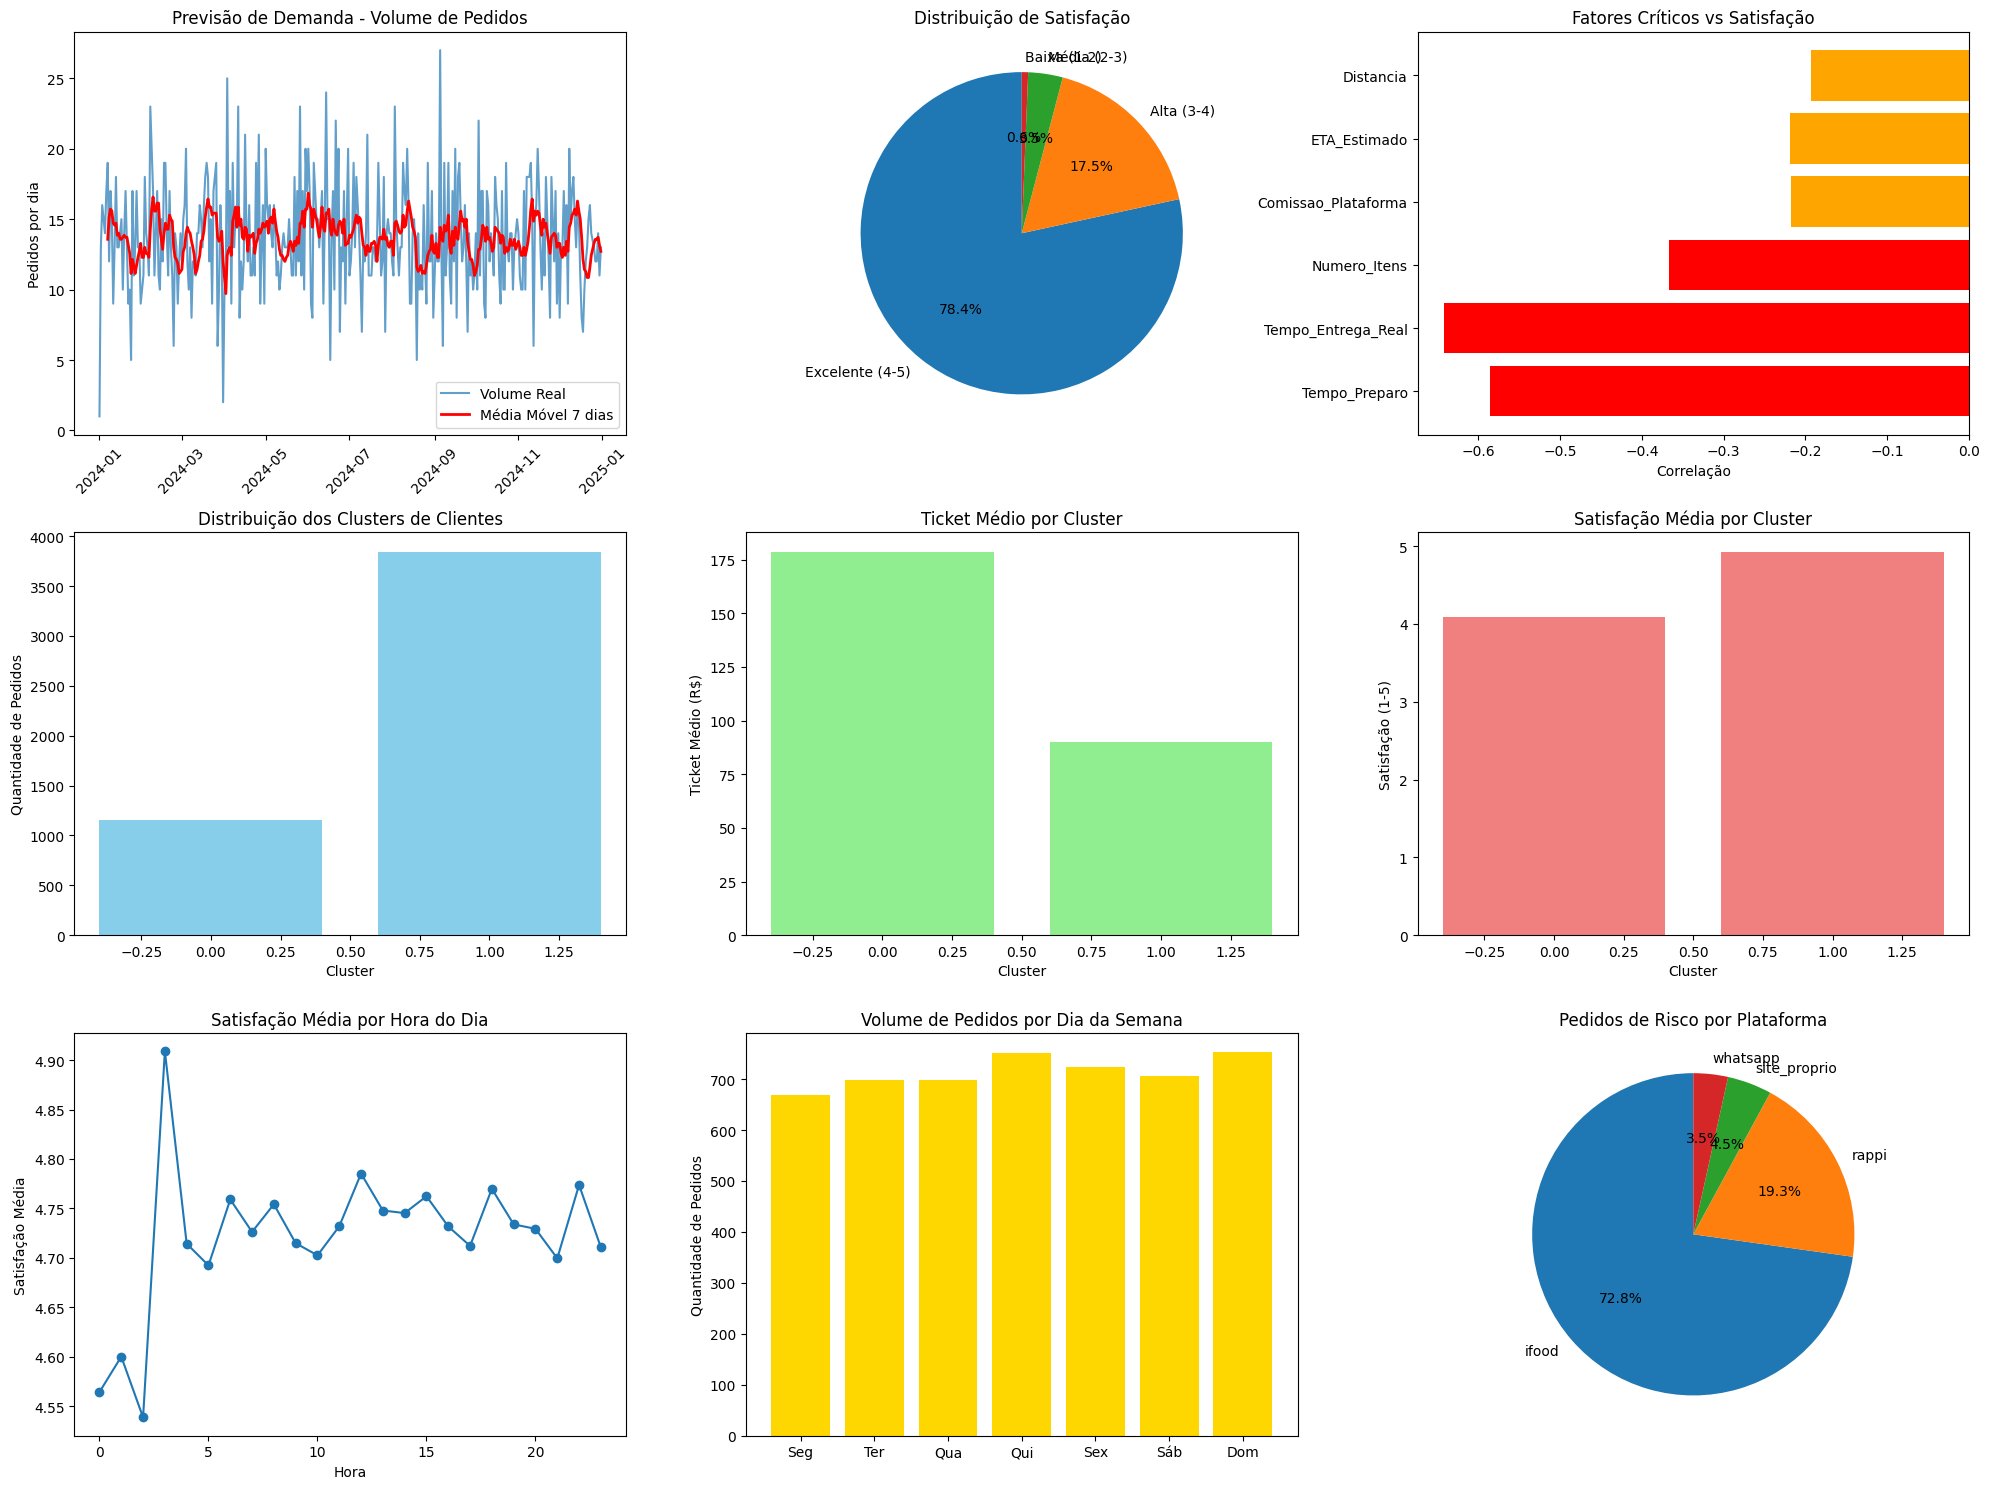

🎯 RESUMO DA FASE 2 - ANÁLISES AVANÇADAS IMPLEMENTADAS:
✅ Modelo de Previsão de Demanda - Otimizar Volume
✅ Análise de Satisfação - Melhorar Experiência
✅ Segmentação de Clientes - Marketing Direcionado


In [ ]:
# VISUALIZAÇÕES DA FASE 2 - ANÁLISES AVANÇADAS

# Criar figura com subplots para visualizar os resultados da Fase 2
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# 1. Previsão de Demanda - Volume de Pedidos
axes[0,0].plot(demanda_diaria.index, demanda_diaria['Volume_Pedidos'], alpha=0.7, label='Volume Real')
axes[0,0].plot(demanda_diaria.index, demanda_diaria['Volume_MA_7'], color='red', linewidth=2, label='Média Móvel 7 dias')
axes[0,0].set_title('Previsão de Demanda - Volume de Pedidos')
axes[0,0].set_ylabel('Pedidos por dia')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Análise de Satisfação - Distribuição
satisfacao_counts = df['satisfacao_categoria'].value_counts()
axes[0,1].pie(satisfacao_counts.values, labels=satisfacao_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribuição de Satisfação')

# 3. Análise de Satisfação - Fatores Críticos
fatores = list(fatores_criticos.keys())
correlacoes = list(fatores_criticos.values())
colors = ['red' if x < -0.3 else 'orange' if x < -0.1 else 'green' for x in correlacoes]
axes[0,2].barh(fatores, correlacoes, color=colors)
axes[0,2].set_title('Fatores Críticos vs Satisfação')
axes[0,2].set_xlabel('Correlação')

# 4. Segmentação - Distribuição dos Clusters
cluster_counts = df['cluster'].value_counts().sort_index()
axes[1,0].bar(cluster_counts.index, cluster_counts.values, color='skyblue')
axes[1,0].set_title('Distribuição dos Clusters de Clientes')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Quantidade de Pedidos')

# 5. Segmentação - Ticket Médio por Cluster
ticket_cluster = df.groupby('cluster')['total_brl'].mean()
axes[1,1].bar(ticket_cluster.index, ticket_cluster.values, color='lightgreen')
axes[1,1].set_title('Ticket Médio por Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Ticket Médio (R$)')

# 6. Segmentação - Satisfação por Cluster
satisfacao_cluster = df.groupby('cluster')['satisfacao_nivel'].mean()
axes[1,2].bar(satisfacao_cluster.index, satisfacao_cluster.values, color='lightcoral')
axes[1,2].set_title('Satisfação Média por Cluster')
axes[1,2].set_xlabel('Cluster')
axes[1,2].set_ylabel('Satisfação (1-5)')

# 7. Análise Temporal - Satisfação por Hora
satisfacao_hora = df.groupby('hora')['satisfacao_nivel'].mean()
axes[2,0].plot(satisfacao_hora.index, satisfacao_hora.values, marker='o')
axes[2,0].set_title('Satisfação Média por Hora do Dia')
axes[2,0].set_xlabel('Hora')
axes[2,0].set_ylabel('Satisfação Média')

# 8. Análise Temporal - Volume por Dia da Semana
volume_dia = df.groupby('dia_semana')['total_brl'].count()
dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
axes[2,1].bar(dias_semana, volume_dia.values, color='gold')
axes[2,1].set_title('Volume de Pedidos por Dia da Semana')
axes[2,1].set_ylabel('Quantidade de Pedidos')

# 9. Análise de Risco - Pedidos de Baixa Satisfação
risco_plataforma = pedidos_risco['platform'].value_counts()
axes[2,2].pie(risco_plataforma.values, labels=risco_plataforma.index, autopct='%1.1f%%', startangle=90)
axes[2,2].set_title('Pedidos de Risco por Plataforma')

plt.tight_layout()
plt.show()

print("🎯 RESUMO DA FASE 2 - ANÁLISES AVANÇADAS IMPLEMENTADAS:")
print("✅ Modelo de Previsão de Demanda - Otimizar Volume")
print("✅ Análise de Satisfação - Melhorar Experiência") 
print("✅ Segmentação de Clientes - Marketing Direcionado")
